In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print("Set up complete")

Set up complete


In [2]:
data = pd.read_csv("loan_detection.csv")

In [3]:
data.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [4]:
data.size

2471280

In [5]:
data.shape

(41188, 60)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [7]:
data.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing and Duplicated data -

In [8]:
data.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [9]:
data.duplicated().sum()

np.int64(2417)

In [10]:
data[data.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [11]:
data.dtypes

age                              int64
campaign                         int64
pdays                            int64
previous                         int64
no_previous_contact              int64
not_working                      int64
job_admin.                       int64
job_blue-collar                  int64
job_entrepreneur                 int64
job_housemaid                    int64
job_management                   int64
job_retired                      int64
job_self-employed                int64
job_services                     int64
job_student                      int64
job_technician                   int64
job_unemployed                   int64
job_unknown                      int64
marital_divorced                 int64
marital_married                  int64
marital_single                   int64
marital_unknown                  int64
education_basic.4y               int64
education_basic.6y               int64
education_basic.9y               int64
education_high.school    

In [12]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(f"----------{i}---------")
        print(f" Mean of {i} : {data[i].mean()} ")
        print(f" Median of {i} : {data[i].median()} ")
        sns.distplot(data[i],color = "green")
        plt.show()

In [13]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
       
        print(f"mean of {i} : {data[i].mean()}")
        print(f"median of {i} : {data[i].median()}\n")

### Imbalance Data -

In [14]:
data["Loan_Status_label"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [15]:
data["Loan_Status_label"].value_counts()

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

## Outliers -

---------age---------


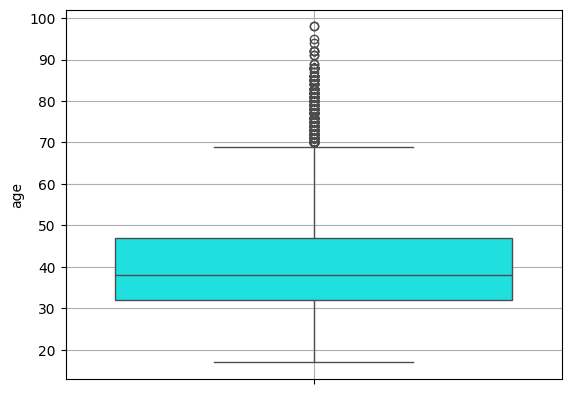

---------campaign---------


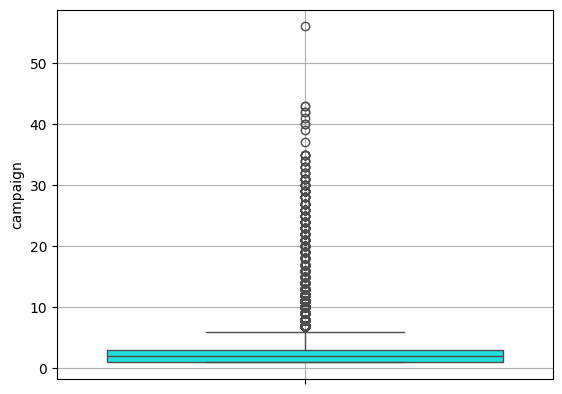

---------pdays---------


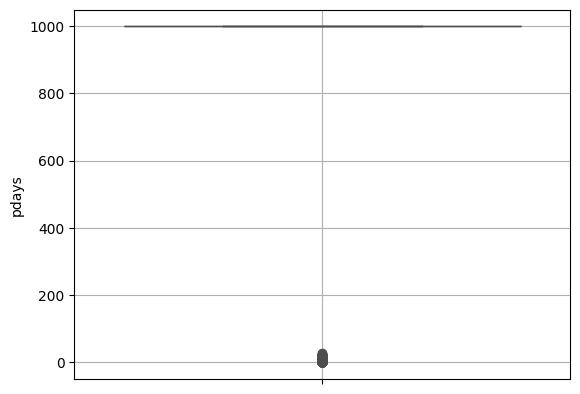

---------previous---------


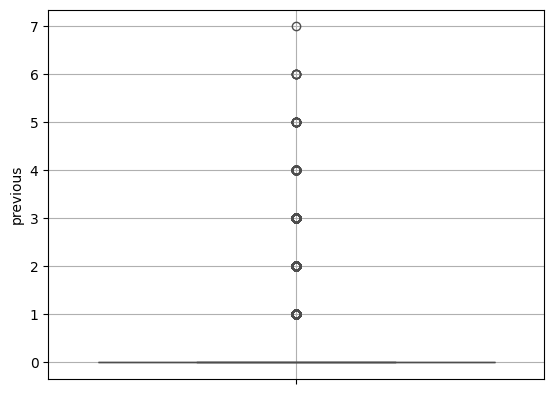

---------no_previous_contact---------


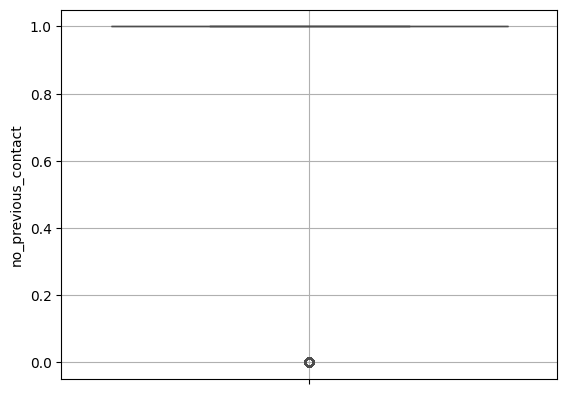

---------not_working---------


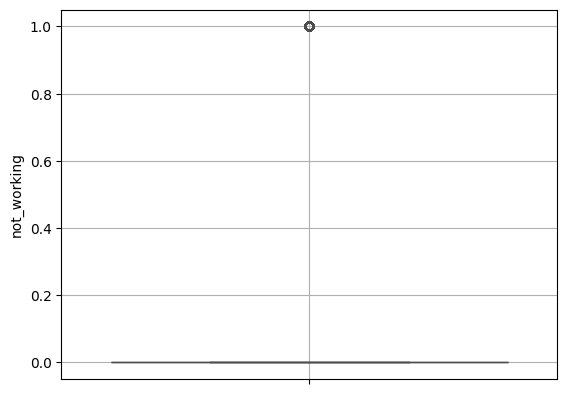

---------job_admin.---------


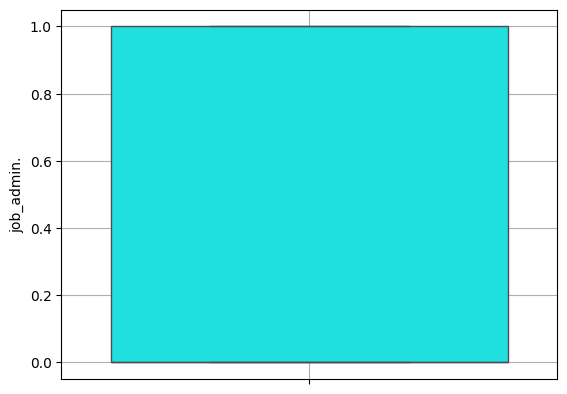

---------job_blue-collar---------


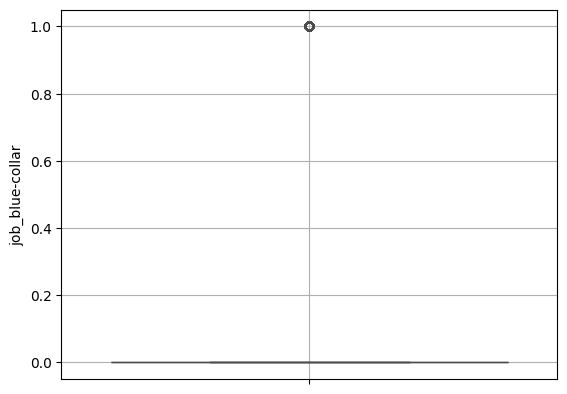

---------job_entrepreneur---------


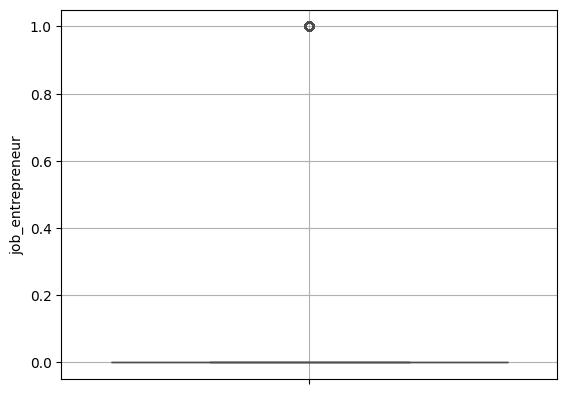

---------job_housemaid---------


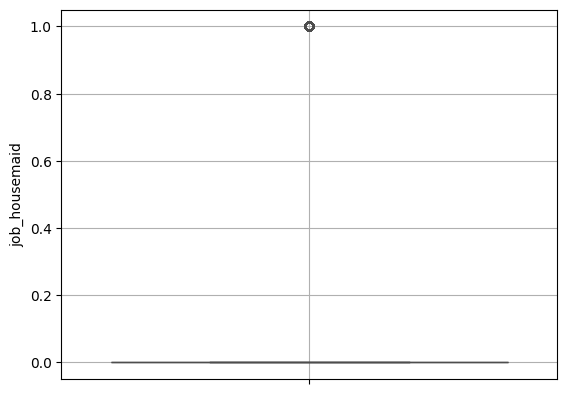

---------job_management---------


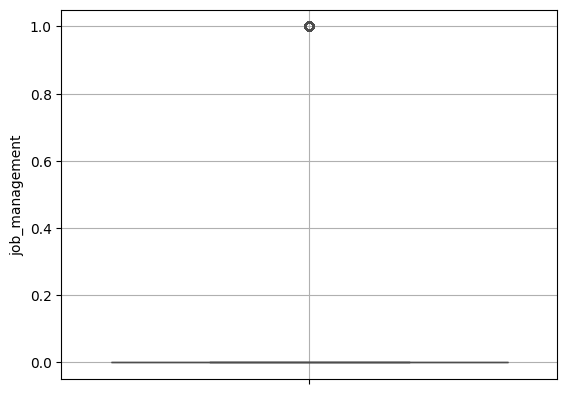

---------job_retired---------


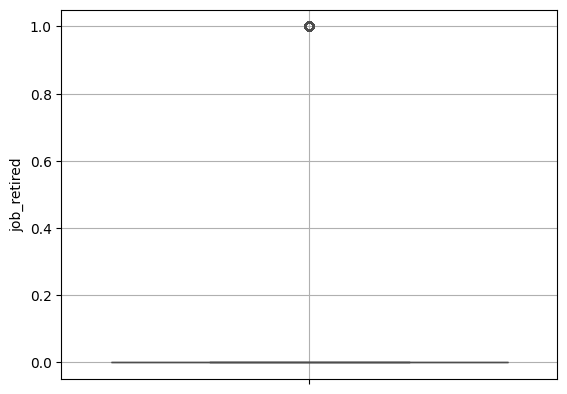

---------job_self-employed---------


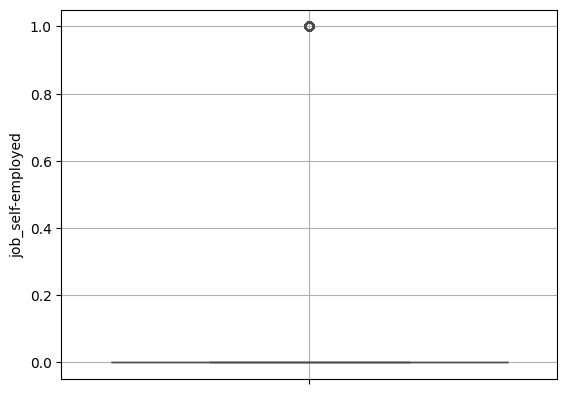

---------job_services---------


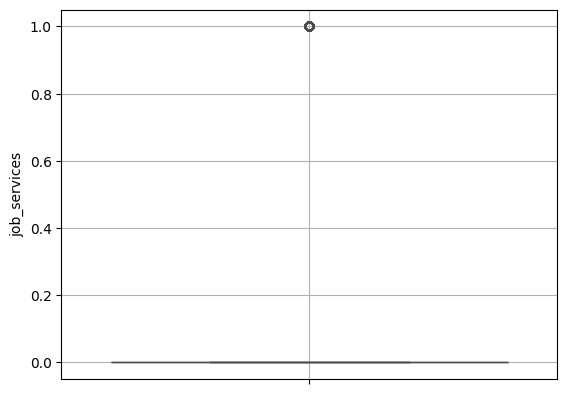

---------job_student---------


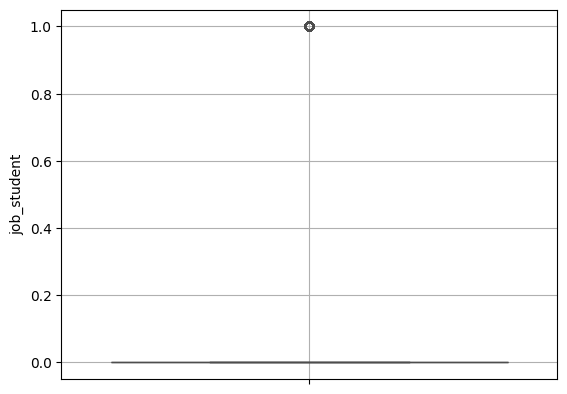

---------job_technician---------


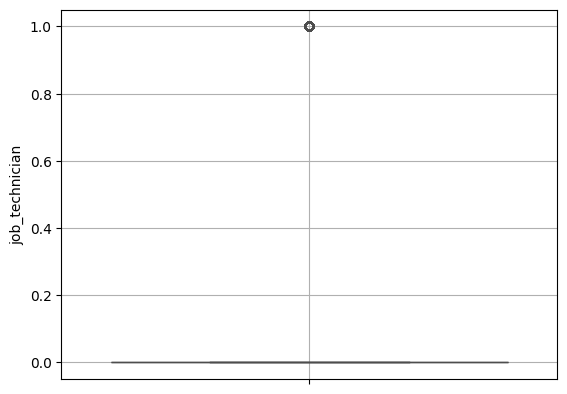

---------job_unemployed---------


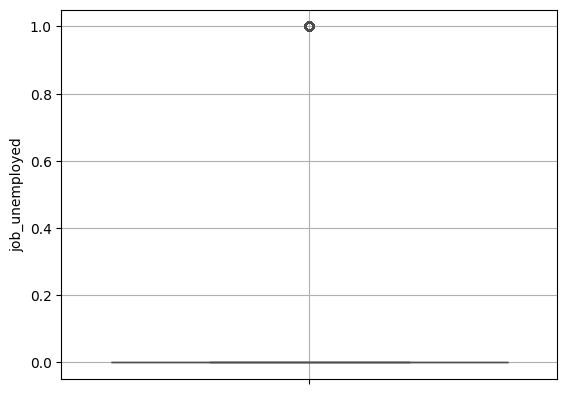

---------job_unknown---------


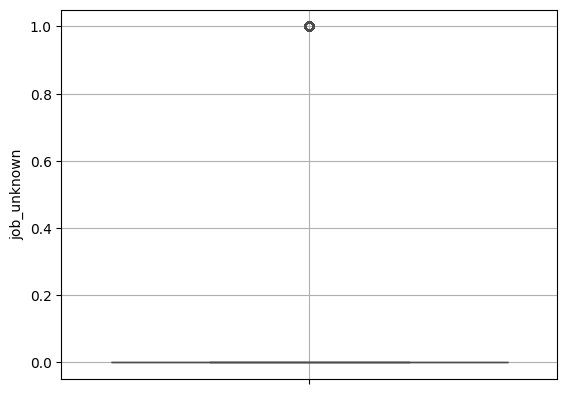

---------marital_divorced---------


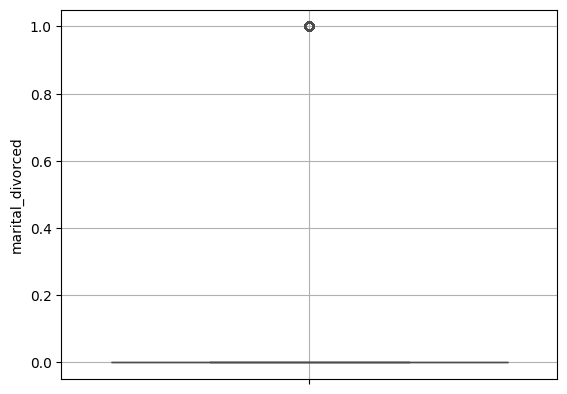

---------marital_married---------


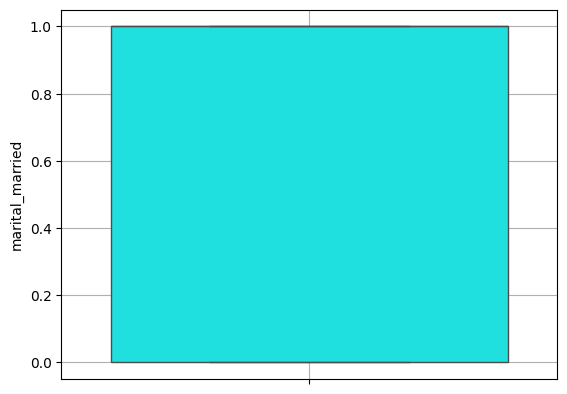

---------marital_single---------


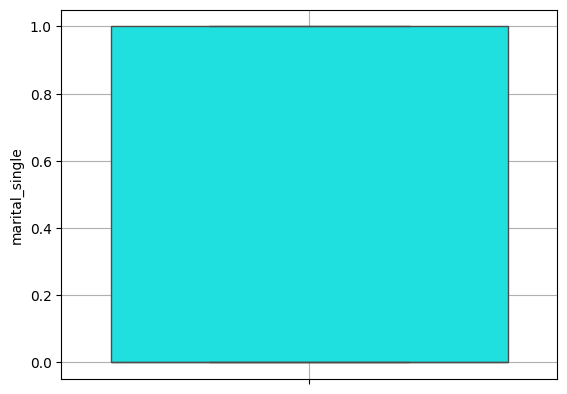

---------marital_unknown---------


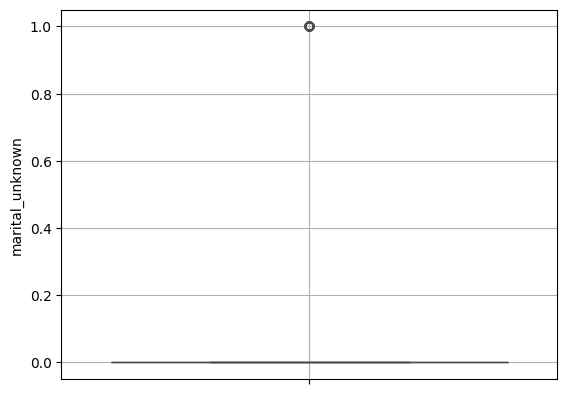

---------education_basic.4y---------


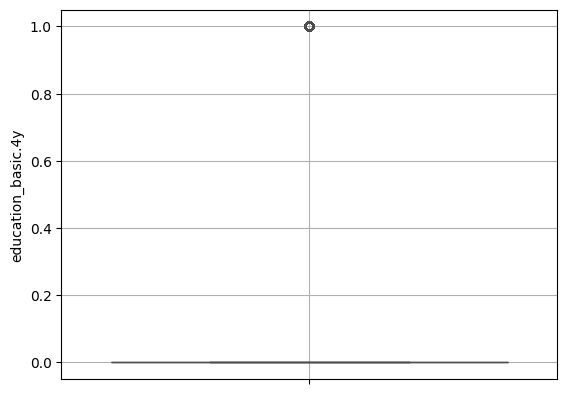

---------education_basic.6y---------


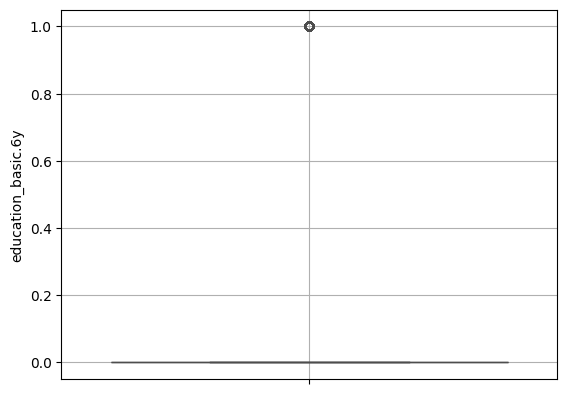

---------education_basic.9y---------


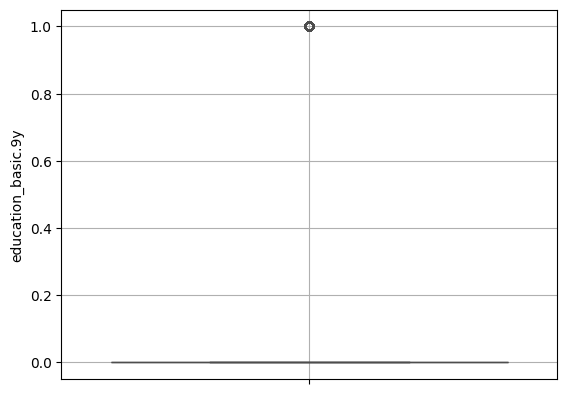

---------education_high.school---------


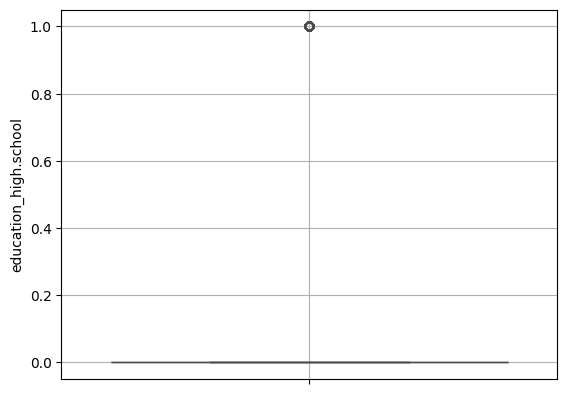

---------education_illiterate---------


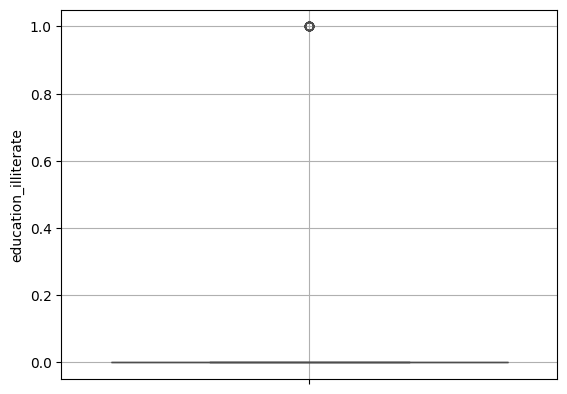

---------education_professional.course---------


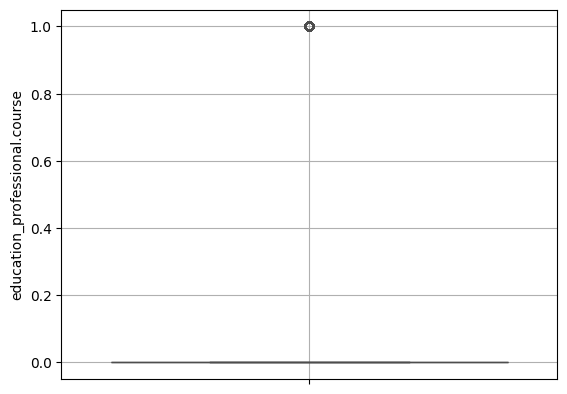

---------education_university.degree---------


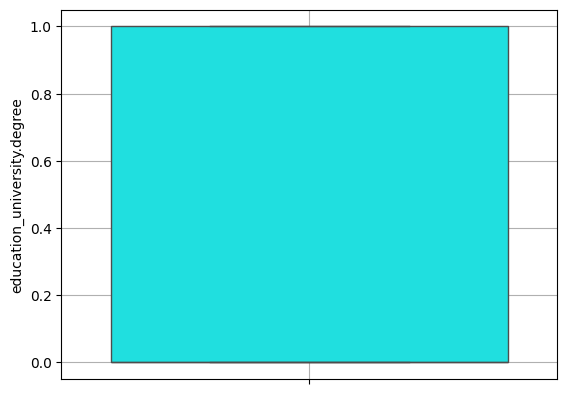

---------education_unknown---------


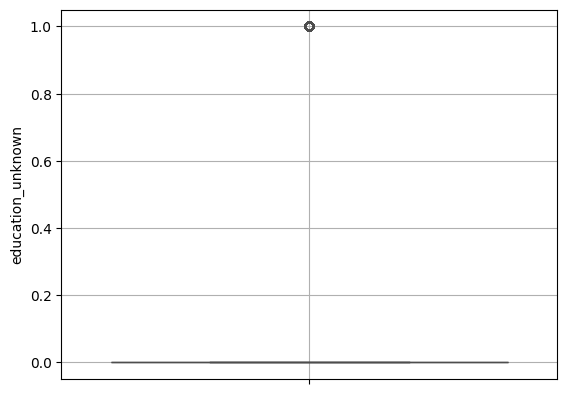

---------default_no---------


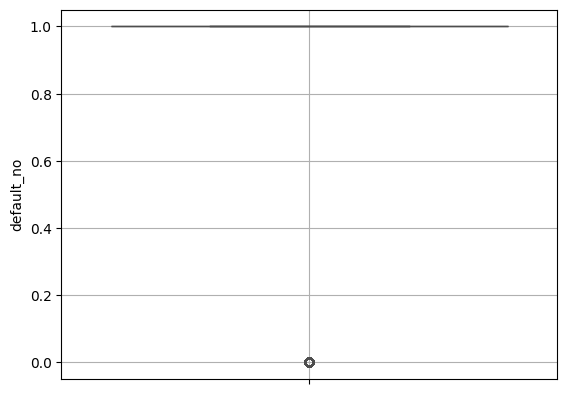

---------default_unknown---------


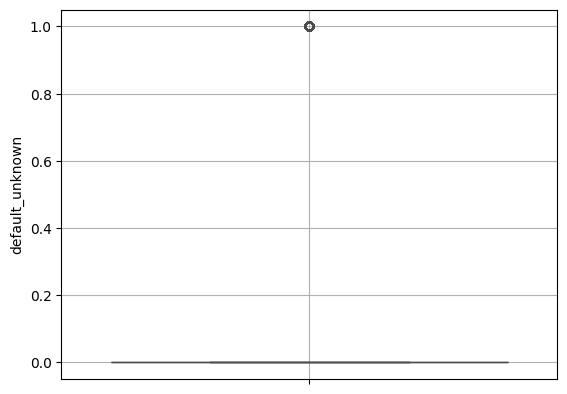

---------default_yes---------


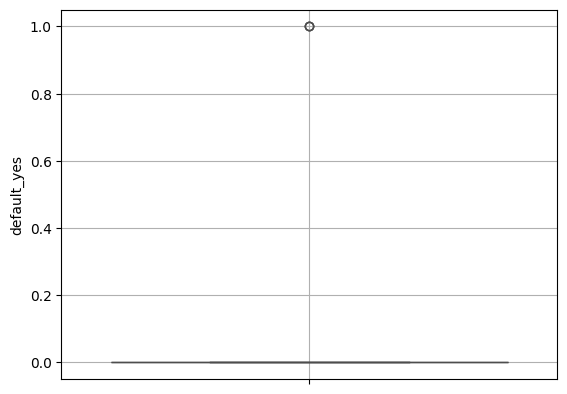

---------housing_no---------


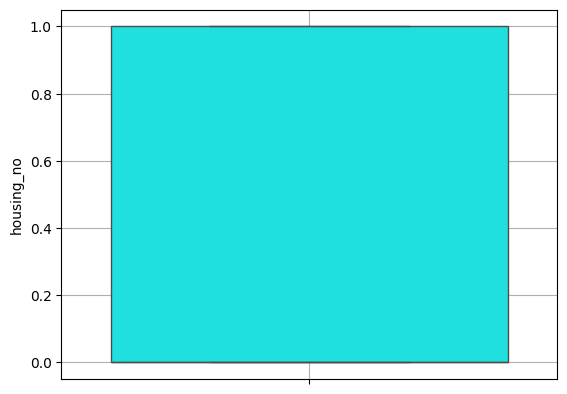

---------housing_unknown---------


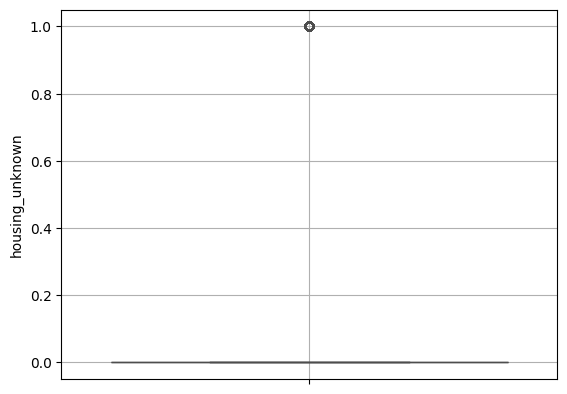

---------housing_yes---------


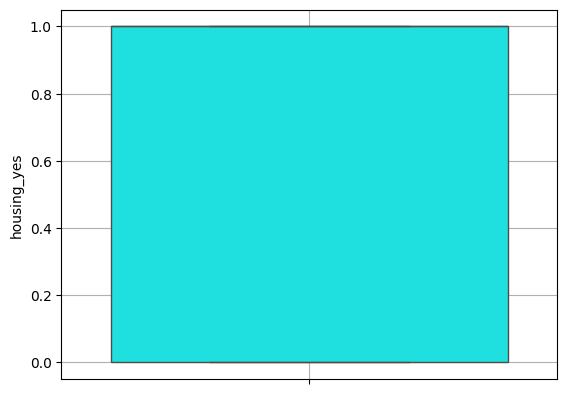

---------loan_no---------


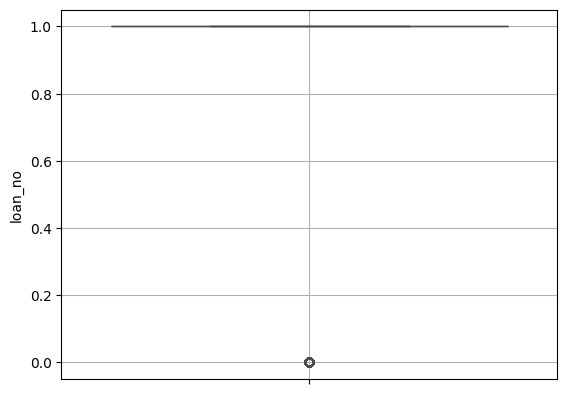

---------loan_unknown---------


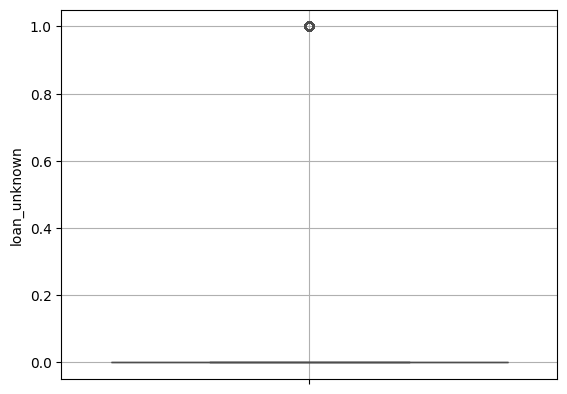

---------loan_yes---------


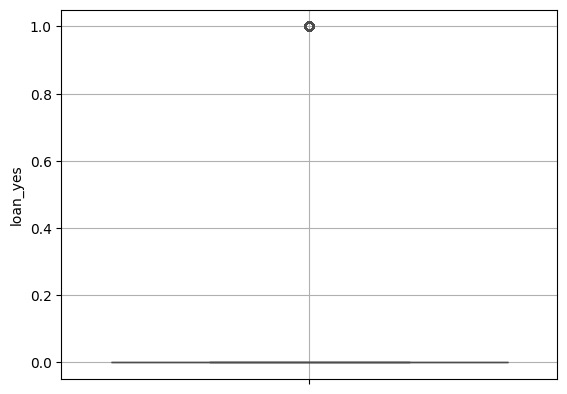

---------contact_cellular---------


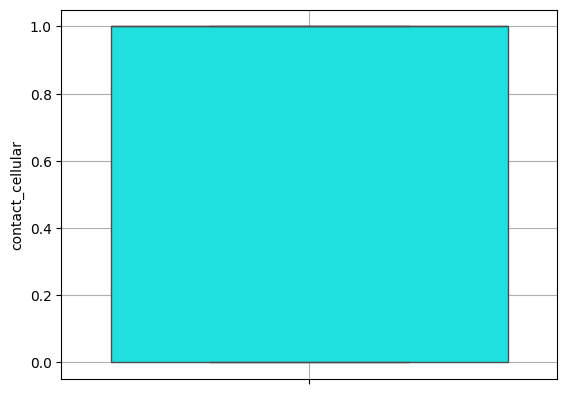

---------contact_telephone---------


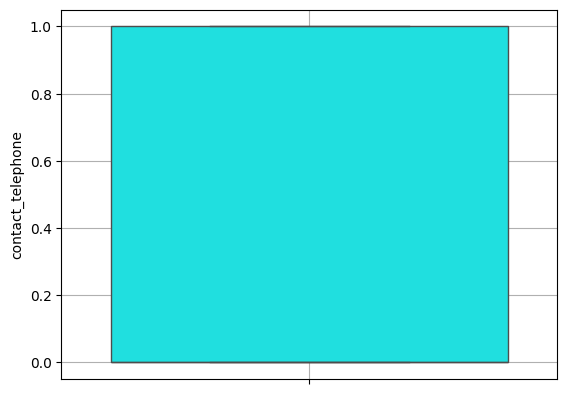

---------month_apr---------


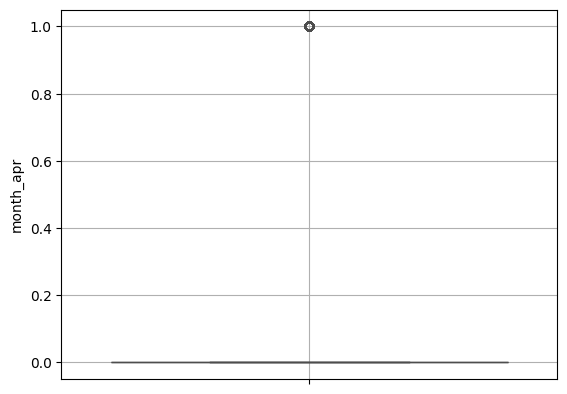

---------month_aug---------


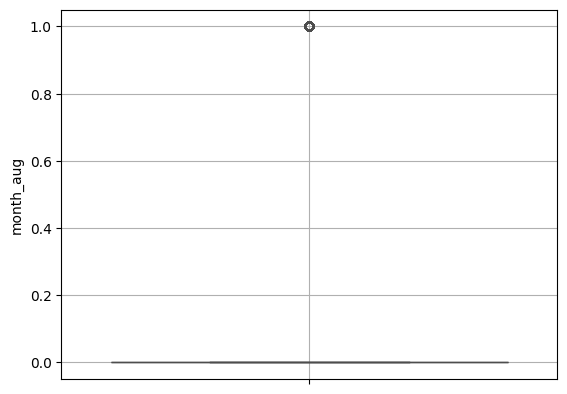

---------month_dec---------


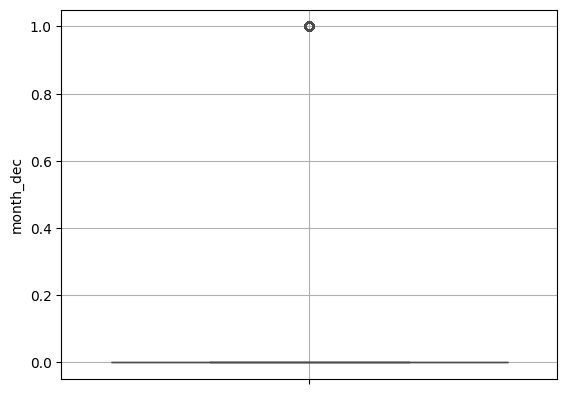

---------month_jul---------


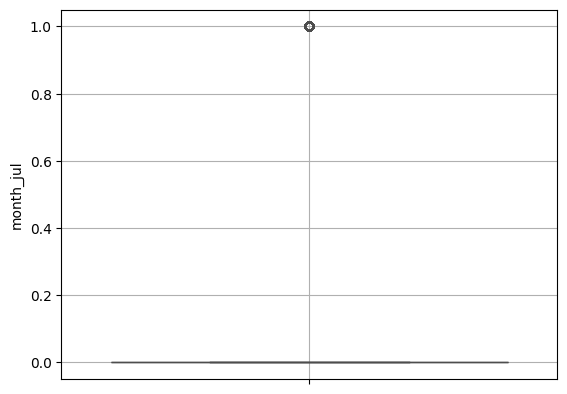

---------month_jun---------


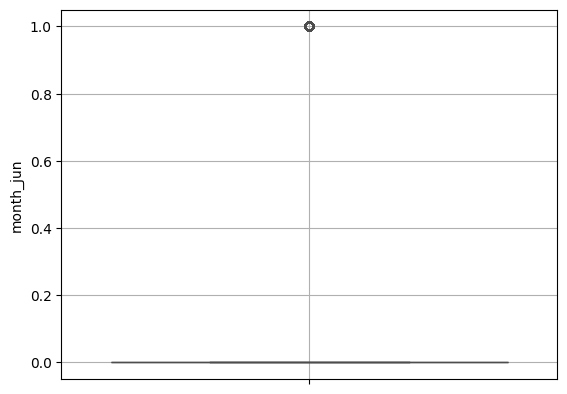

---------month_mar---------


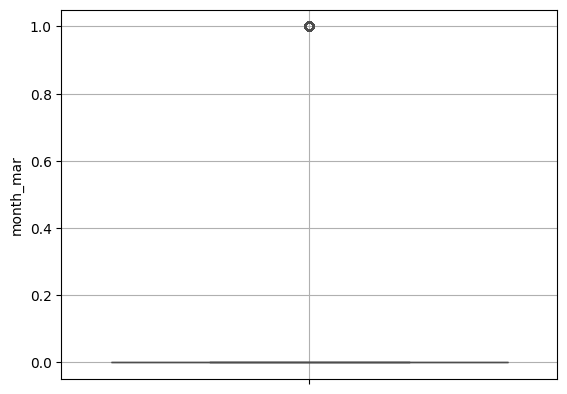

---------month_may---------


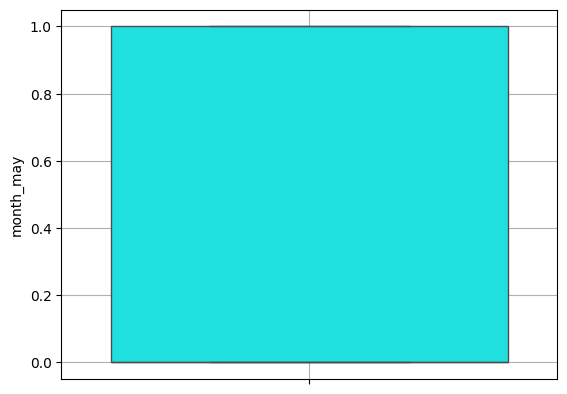

---------month_nov---------


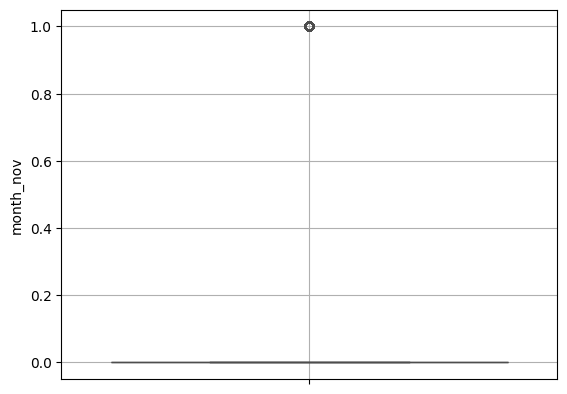

---------month_oct---------


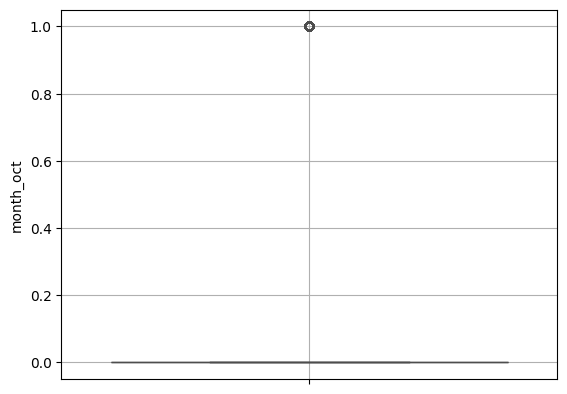

---------month_sep---------


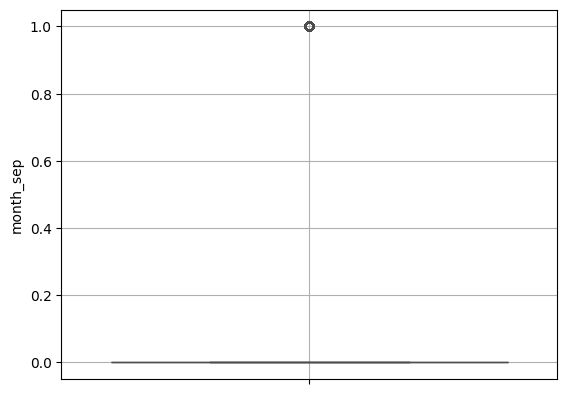

---------day_of_week_fri---------


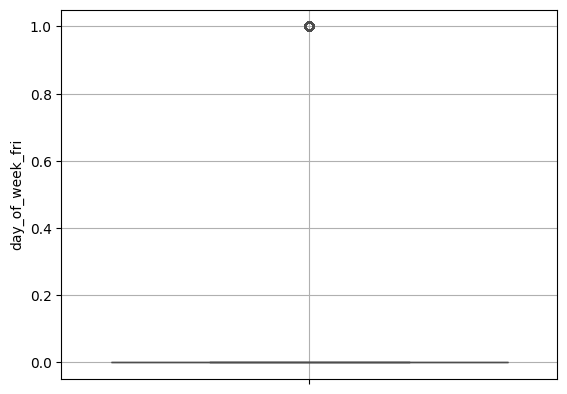

---------day_of_week_mon---------


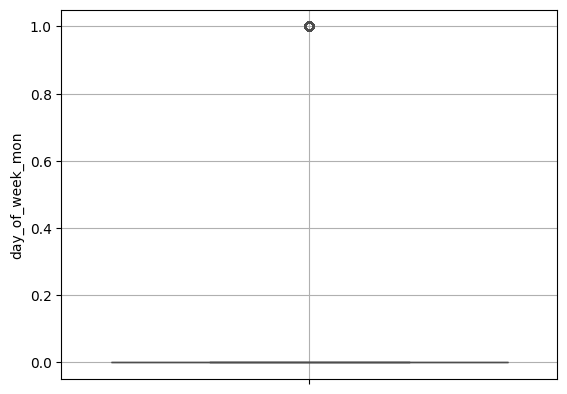

---------day_of_week_thu---------


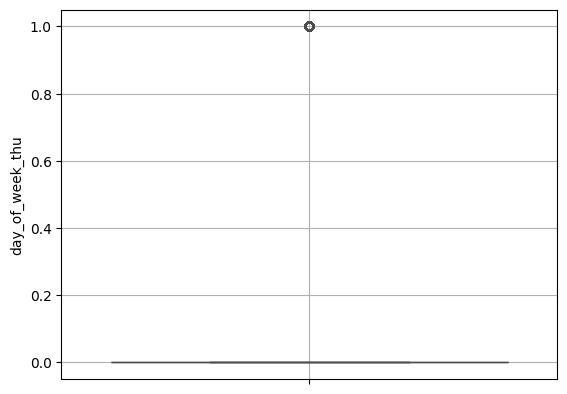

---------day_of_week_tue---------


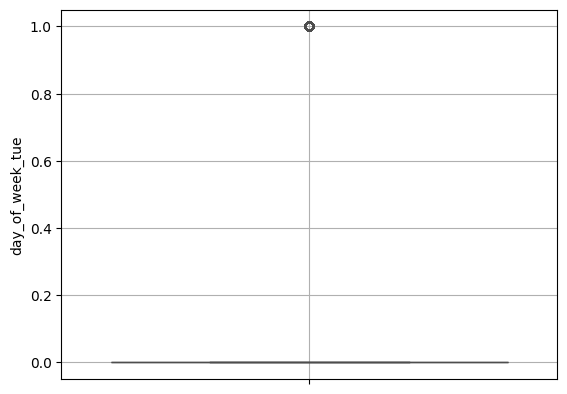

---------day_of_week_wed---------


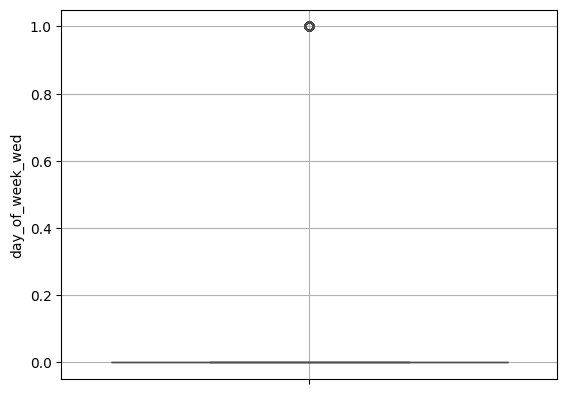

---------poutcome_failure---------


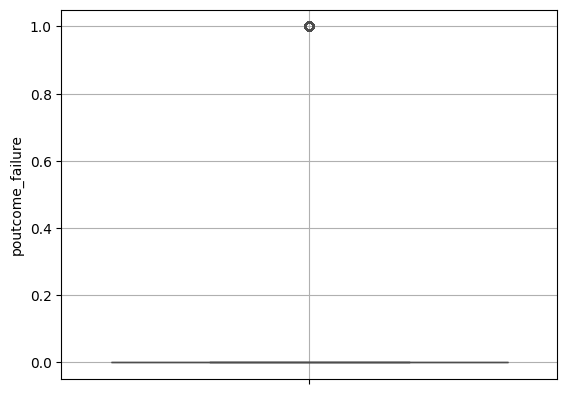

---------poutcome_nonexistent---------


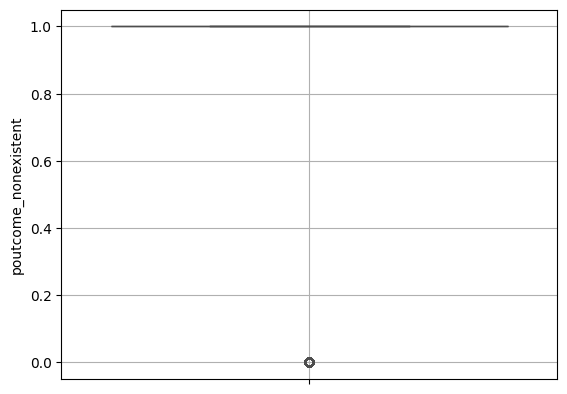

---------poutcome_success---------


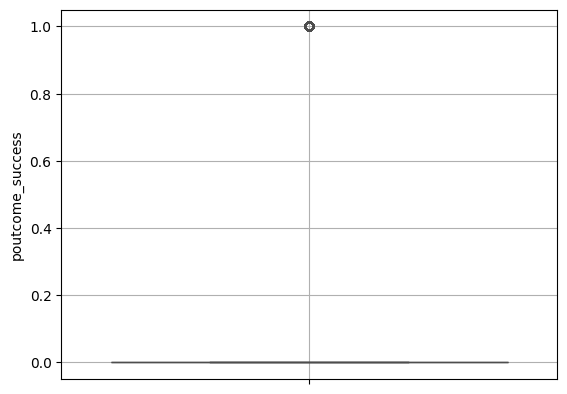

In [16]:
for i in data.columns:
    if i == "Loan_Status_label":
        pass
    else:
        print(f"---------{i}---------")
        sns.boxplot(data[i],color = "aqua")
        plt.grid()
        plt.show()


#### This dataset is about  bank customers data so we cannot remove any outliers because this dataset have  sensitive data.

## Feature Selection -

In [17]:
data.corr()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
age,1.000000,0.004594,-0.034369,0.024365,-0.034292,0.207547,-0.102584,-0.024191,0.031213,0.085403,...,0.040889,0.007148,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.052569,-0.017529,0.011745,-0.001775,-0.002203,0.004226,...,-0.033953,0.026641,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.999992,-0.112797,-0.025398,0.065335,0.019246,-0.001649,...,-0.154629,0.013782,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.587462,0.104066,0.018888,-0.054845,-0.013239,-0.011569,...,0.157651,0.004404,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,0.230181
no_previous_contact,-0.034292,0.052569,0.999992,-0.587462,1.000000,-0.112795,-0.025412,0.065328,0.019247,-0.001638,...,-0.154616,0.013775,0.001009,-0.008187,-0.007282,0.001033,0.006104,0.491357,-0.950283,-0.324877
not_working,0.207547,-0.017529,-0.112797,0.104066,-0.112795,1.000000,-0.180369,-0.166824,-0.059324,-0.050367,...,0.085305,0.002009,-0.005305,-0.002442,0.008890,-0.002960,0.032294,-0.083051,0.104134,0.121246
job_admin.,-0.102584,0.011745,-0.025398,0.018888,-0.025412,-0.180369,1.000000,-0.313313,-0.111417,-0.094595,...,0.010407,0.009892,-0.000736,-0.003970,-0.001835,-0.003112,0.002771,-0.015560,0.025069,0.031426
job_blue-collar,-0.024191,-0.001775,0.065335,-0.054845,0.065328,-0.166824,-0.313313,1.000000,-0.103050,-0.087492,...,-0.054309,0.003329,-0.009754,-0.007062,-0.006829,0.020673,-0.013254,0.043843,-0.061403,-0.074423
job_entrepreneur,0.031213,-0.002203,0.019246,-0.013239,0.019247,-0.059324,-0.111417,-0.103050,1.000000,-0.031113,...,-0.009172,-0.001905,0.006828,0.005551,-0.007275,-0.003480,0.001595,0.007598,-0.017238,-0.016644
job_housemaid,0.085403,0.004226,-0.001649,-0.011569,-0.001638,-0.050367,-0.094595,-0.087492,-0.031113,1.000000,...,-0.003503,-0.007595,0.003365,-0.009014,0.011500,0.001797,-0.017853,0.014629,0.002276,-0.006505


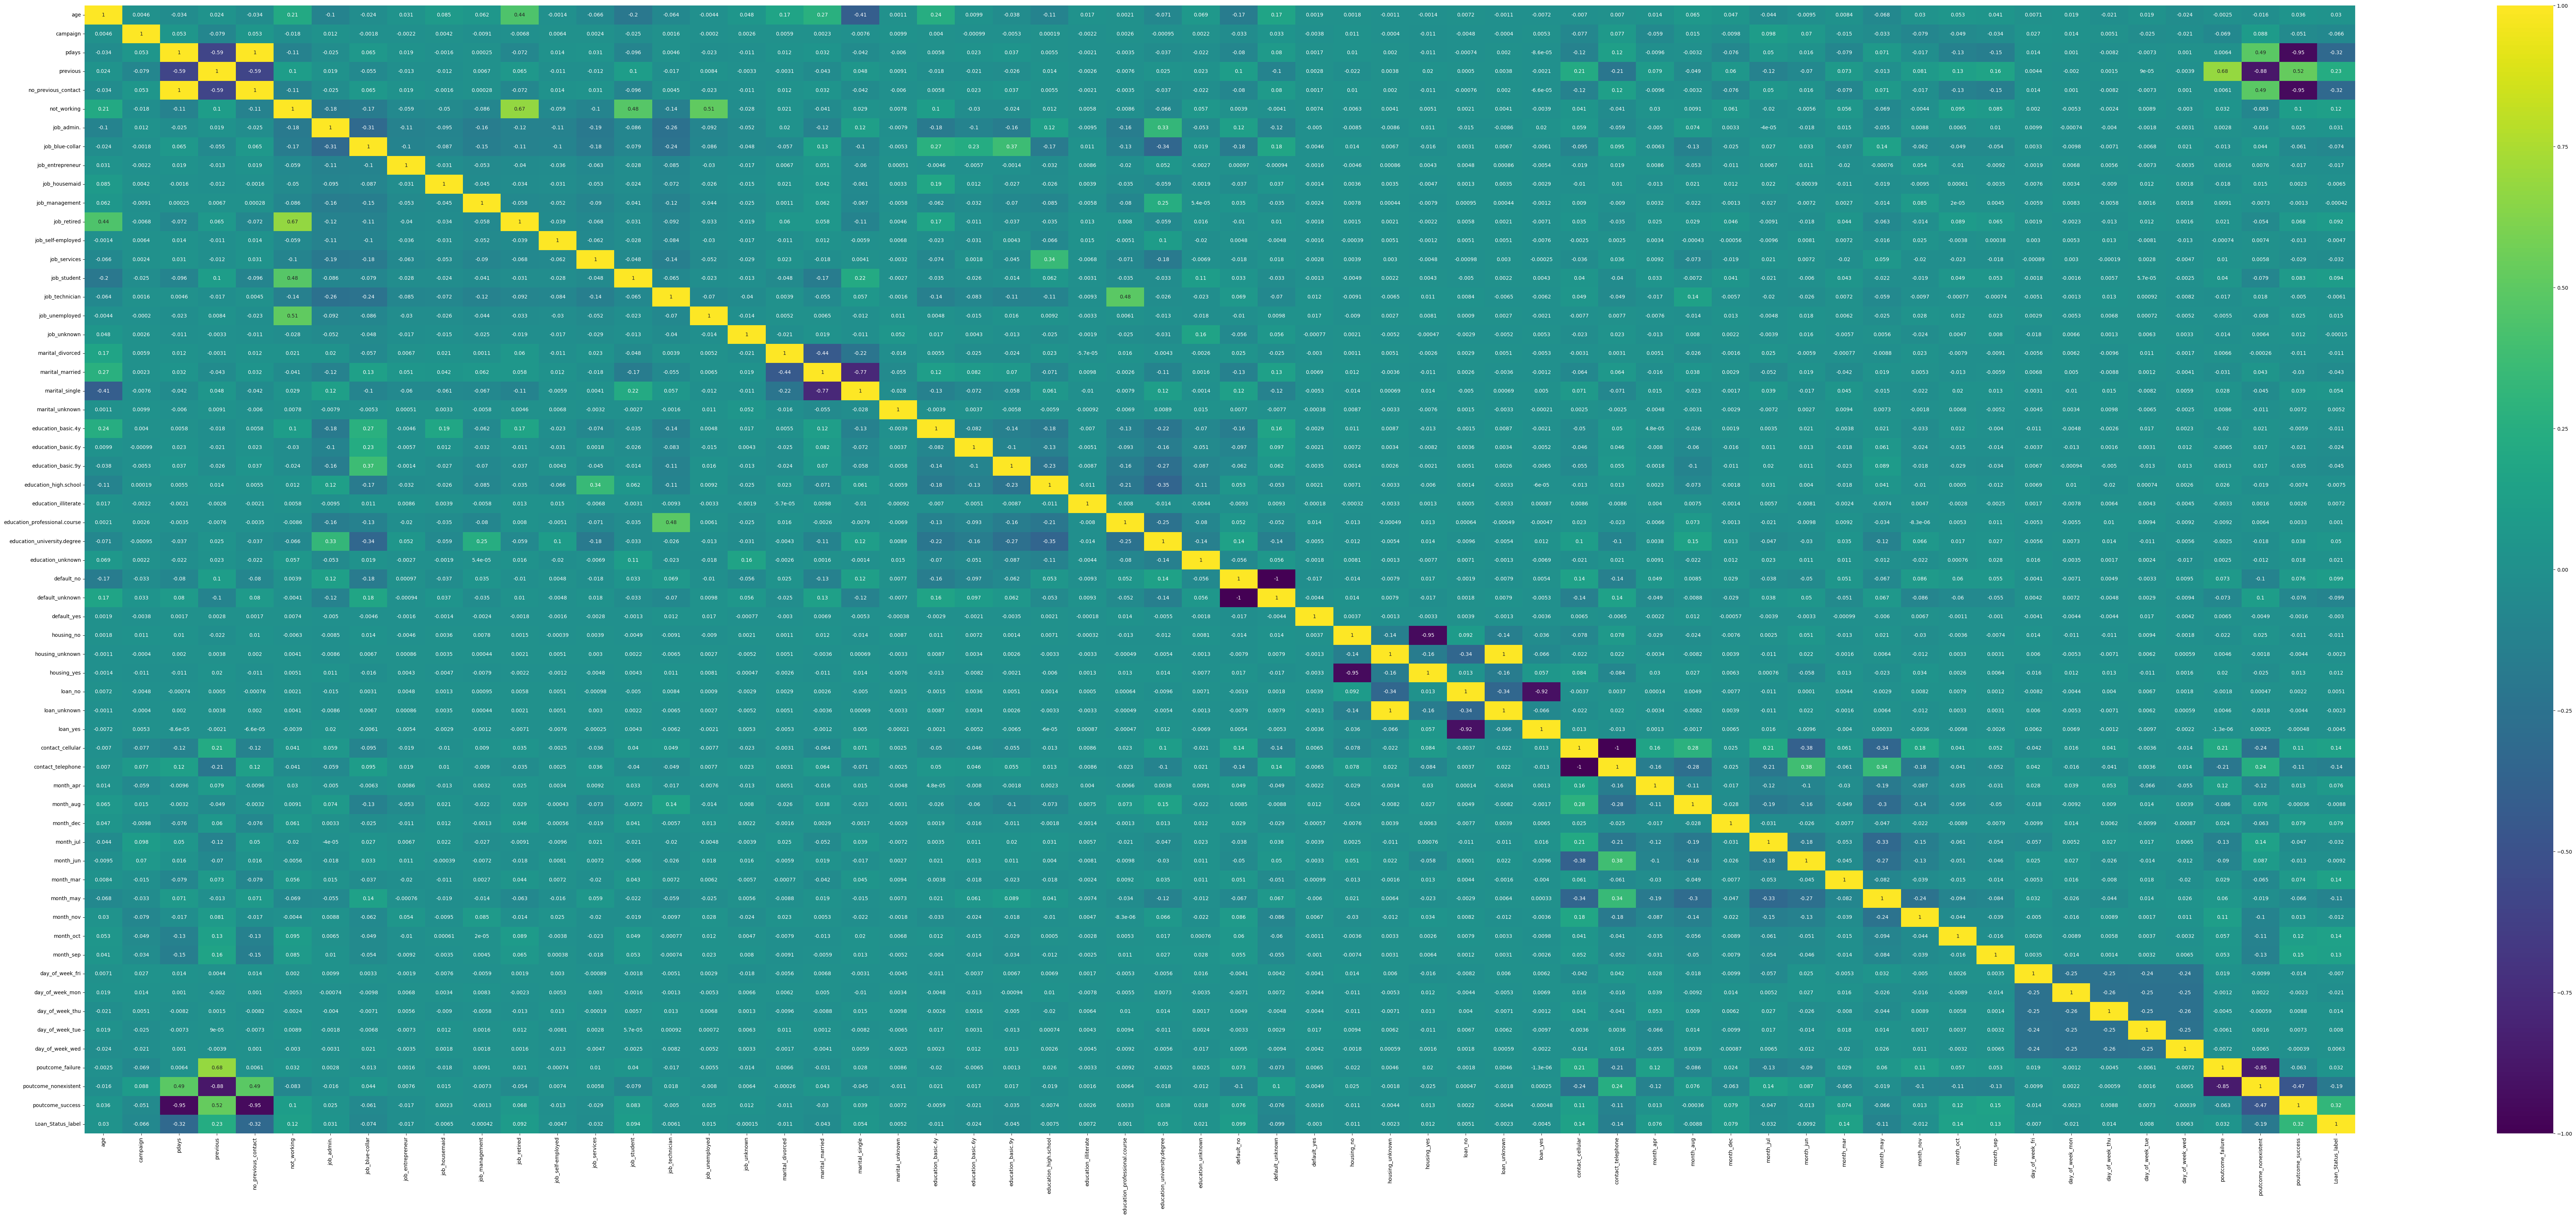

In [18]:
plt.figure(figsize = (100,40))
sns.heatmap(data.corr(),annot = True,cmap = "viridis")
plt.show()

## Independent Data and Dependent Data -

In [19]:
X = data.drop(columns = ["Loan_Status_label"],axis = 1)
y = data["Loan_Status_label"]

## Spliting Data into train_test_split -

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Feature Scalling -

In [21]:
sc = StandardScaler()

In [22]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [23]:
X_train_sc

array([[-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-8.64094846e-01,  5.13675879e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [ 1.81900684e+00,  1.23359337e+00,  1.94660673e-01, ...,
         2.93701532e+00, -2.51020518e+00, -1.84965343e-01],
       ...,
       [-4.80794606e-01, -5.66200360e-01, -5.14775262e+00, ...,
        -3.40481710e-01, -2.51020518e+00,  5.40641820e+00],
       [-1.66930454e-03, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01],
       [-1.05574497e+00, -2.06241614e-01,  1.94660673e-01, ...,
        -3.40481710e-01,  3.98373809e-01, -1.84965343e-01]])

In [24]:
X_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
32884,57,1,999,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3169,55,2,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32206,33,1,999,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
9403,36,4,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14020,27,2,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,27,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
23440,41,7,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
29431,46,12,999,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
16627,31,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## Model Selection -

### Logistic Regression -

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [27]:
print(f"training accuracy : {round(lr.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(lr.score(X_test,y_test),2)*100}%")

training accuracy : 89.0%
testing accuracy : 89.0%


## Dicision Tree -

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [30]:
print(f"training accuracy : {round(dt.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(dt.score(X_test,y_test),2)*100}%")

training accuracy : 56.00000000000001%
testing accuracy : 56.00000000000001%


## Gradient Boosting -

In [31]:
gb = GradientBoostingClassifier()

In [32]:
gb.fit(X_train_sc,y_train)

GradientBoostingClassifier()

In [33]:
print(f"training accuracy : {round(gb.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(gb.score(X_test,y_test),2)*100}%")

training accuracy : 89.0%
testing accuracy : 89.0%


## Random Forest Classifier -

In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(X_train_sc,y_train)

RandomForestClassifier()

In [36]:
print(f"training accuracy : {round(rf.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(rf.score(X_test,y_test),2)*100}%")

training accuracy : 87.0%
testing accuracy : 87.0%


## Model Training -

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train_sc,y_train)

LogisticRegression()

## Model Prediction -

In [39]:
y_pred_train = gb.predict(X_train_sc)
y_pred_test = gb.predict(X_test_sc)

In [40]:
y_train[:10]

12556    0
35451    0
30592    0
17914    0
3315     0
29191    0
30549    0
6098     0
6252     0
13373    0
Name: Loan_Status_label, dtype: int64

In [41]:
y_pred_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
y_test[:10]

32884    0
3169     0
32206    0
9403     0
14020    0
17201    0
879      0
23757    0
10821    0
14355    0
Name: Loan_Status_label, dtype: int64

In [43]:
y_pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Model Evaluation -

In [44]:
confusion_matrix(y_pred_train,y_train)

array([[28913,  2897],
       [  332,   808]])

In [45]:
accuracy_score(y_pred_train,y_train)

0.9020030349013657

In [46]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     31810
           1       0.22      0.71      0.33      1140

    accuracy                           0.90     32950
   macro avg       0.60      0.81      0.64     32950
weighted avg       0.96      0.90      0.93     32950



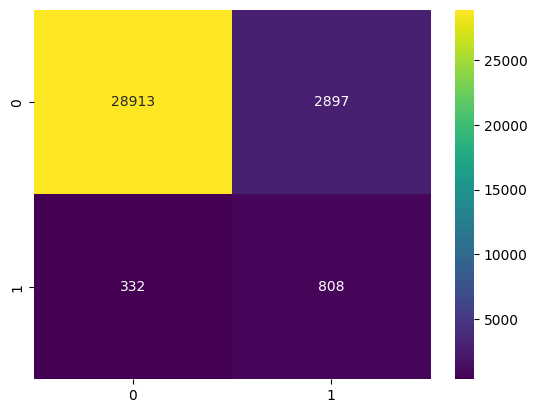

In [47]:
sns.heatmap(confusion_matrix(y_pred_train,y_train),annot = True,fmt = "0.6g",cmap = "viridis")
plt.show()

In [48]:
confusion_matrix(y_test,y_pred_test)

array([[7200,  103],
       [ 748,  187]])

In [49]:
accuracy_score(y_pred_test,y_test)

0.896698227725176

In [50]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94      7948
           1       0.20      0.64      0.31       290

    accuracy                           0.90      8238
   macro avg       0.59      0.78      0.62      8238
weighted avg       0.96      0.90      0.92      8238



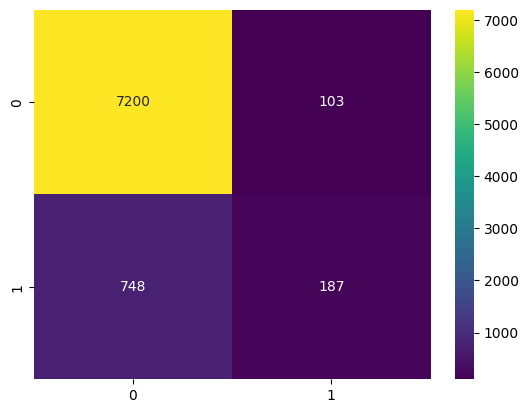

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot = True,fmt = ".6g",cmap = "viridis")
plt.show()

## Now train data without outliers -

---------age---------


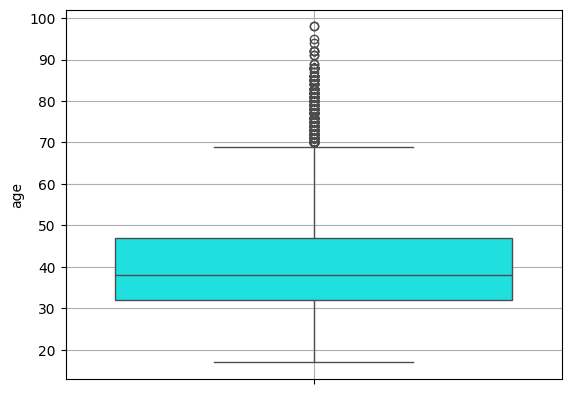

---------campaign---------


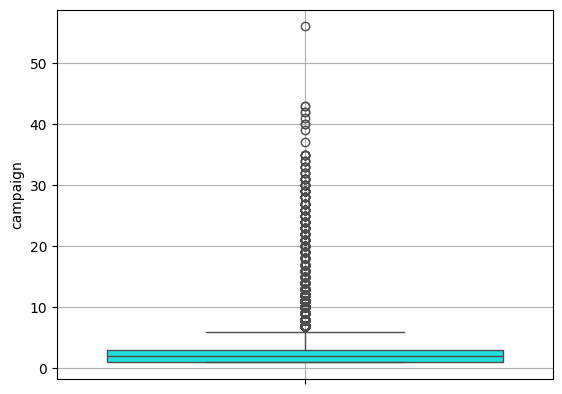

---------pdays---------


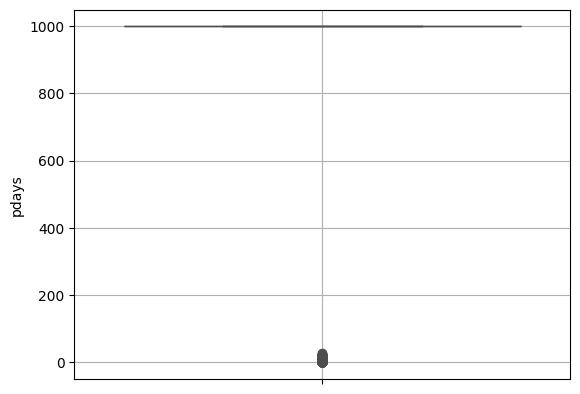

---------previous---------


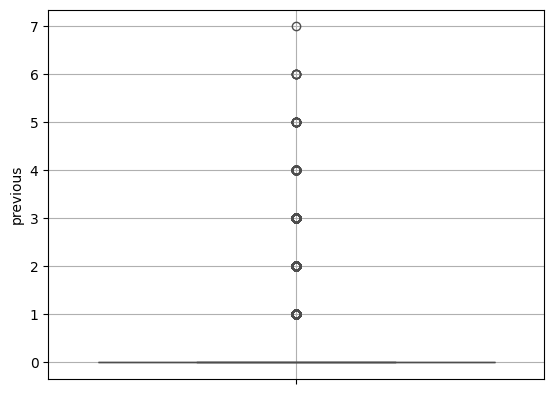

---------no_previous_contact---------


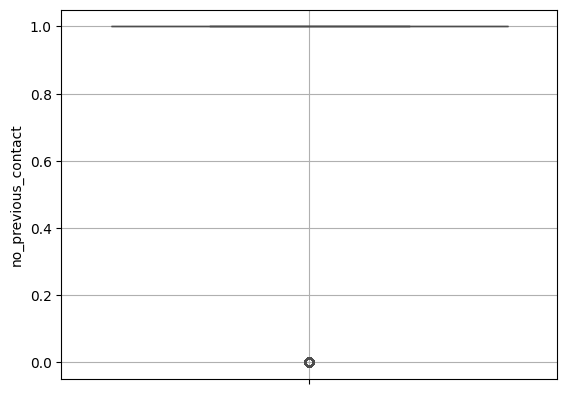

---------not_working---------


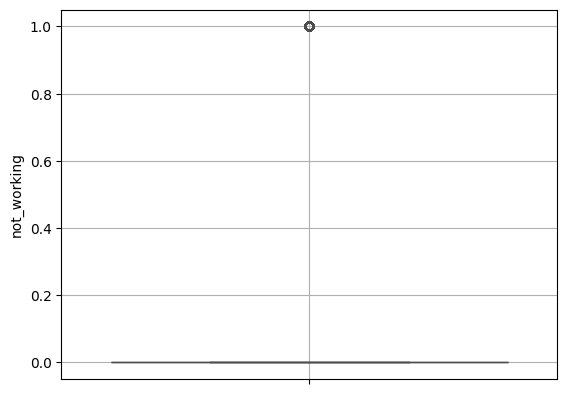

---------job_admin.---------


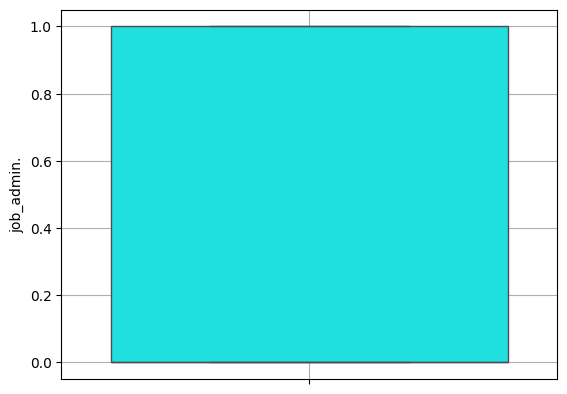

---------job_blue-collar---------


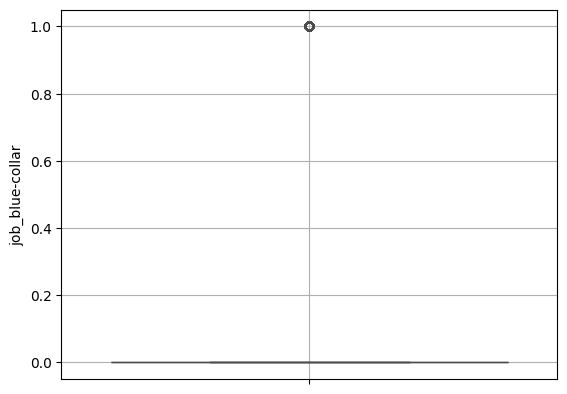

---------job_entrepreneur---------


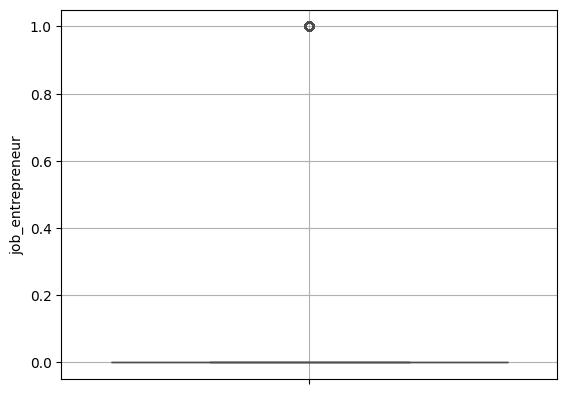

---------job_housemaid---------


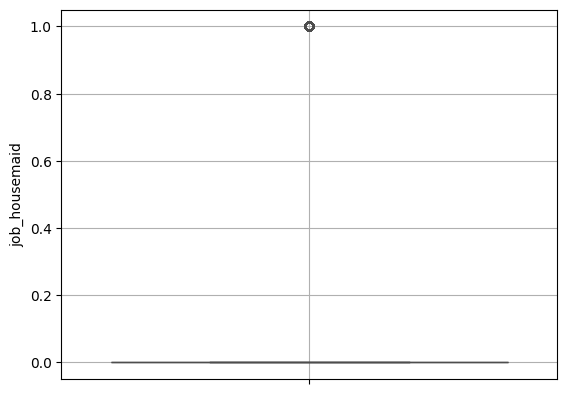

---------job_management---------


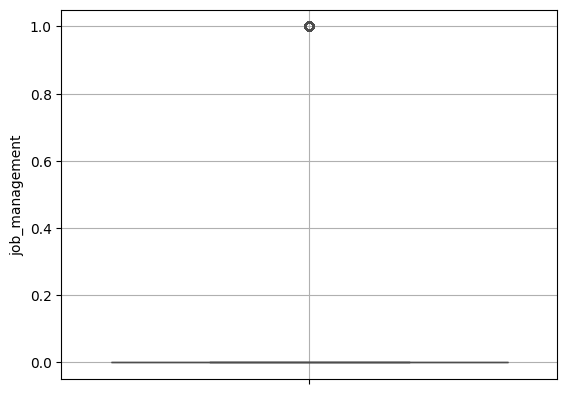

---------job_retired---------


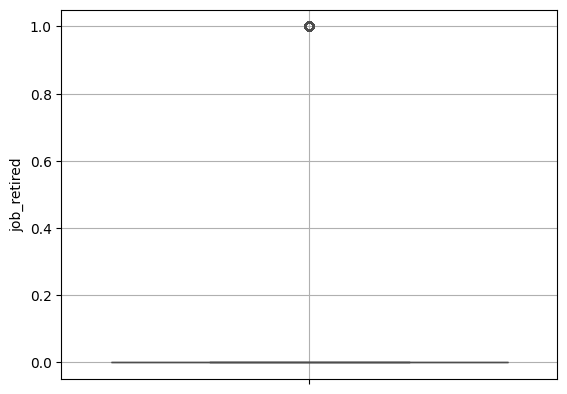

---------job_self-employed---------


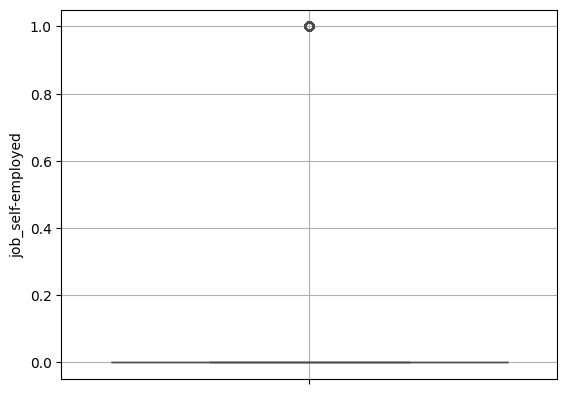

---------job_services---------


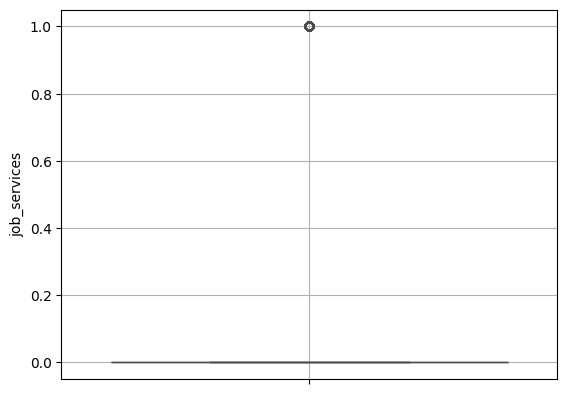

---------job_student---------


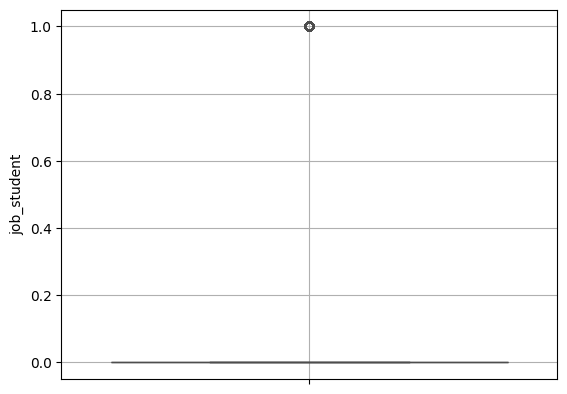

---------job_technician---------


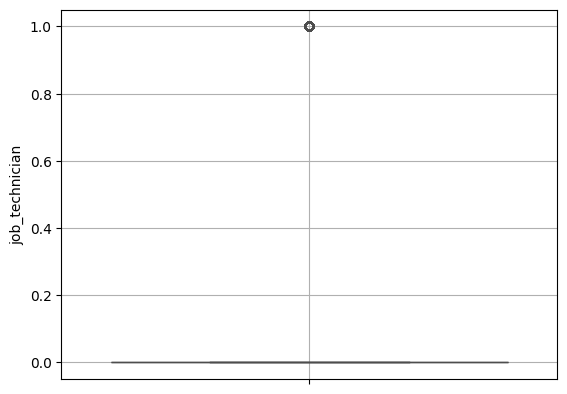

---------job_unemployed---------


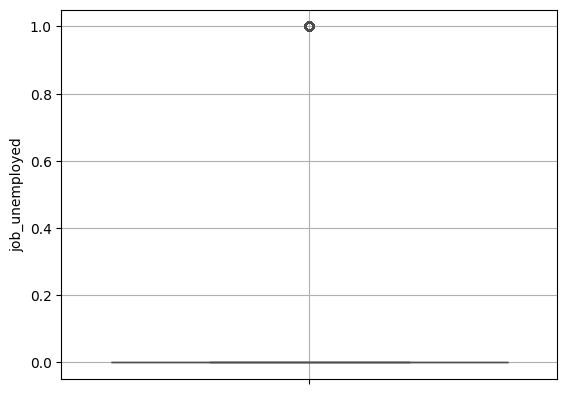

---------job_unknown---------


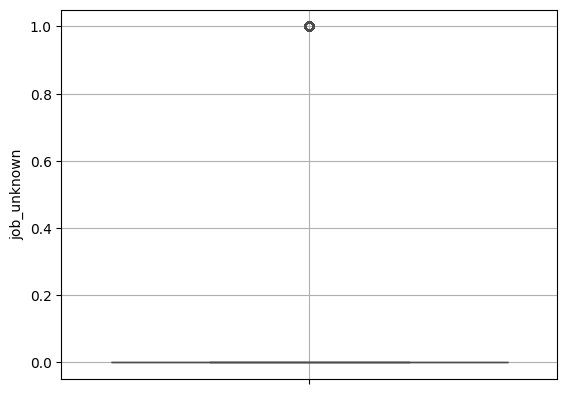

---------marital_divorced---------


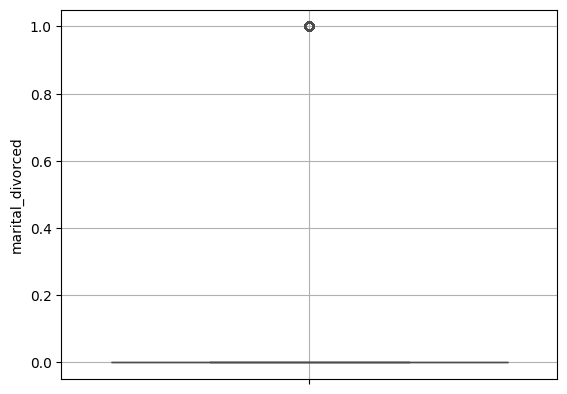

---------marital_married---------


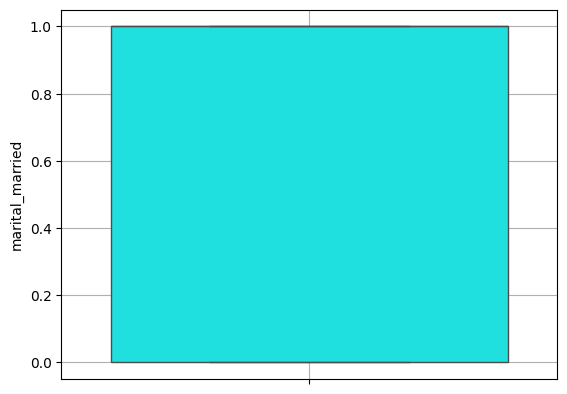

---------marital_single---------


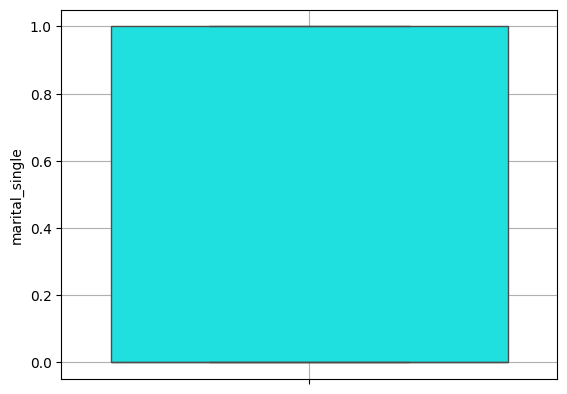

---------marital_unknown---------


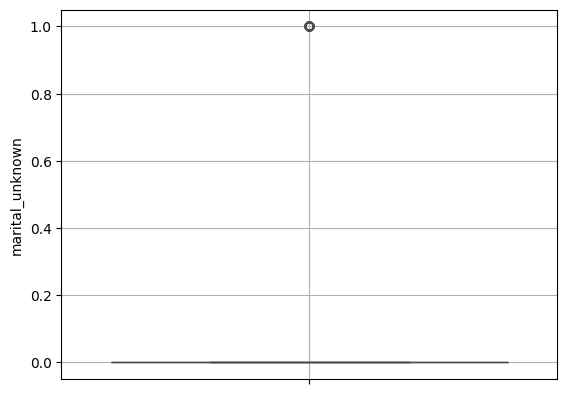

---------education_basic.4y---------


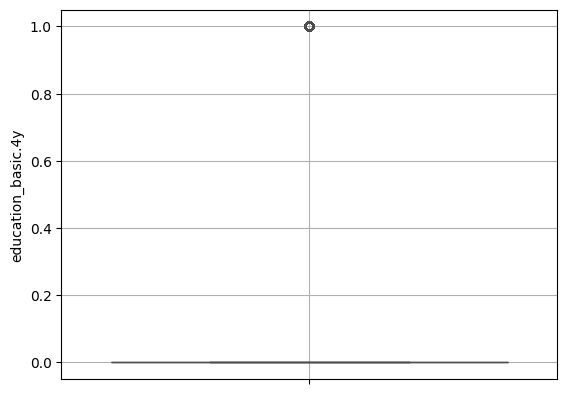

---------education_basic.6y---------


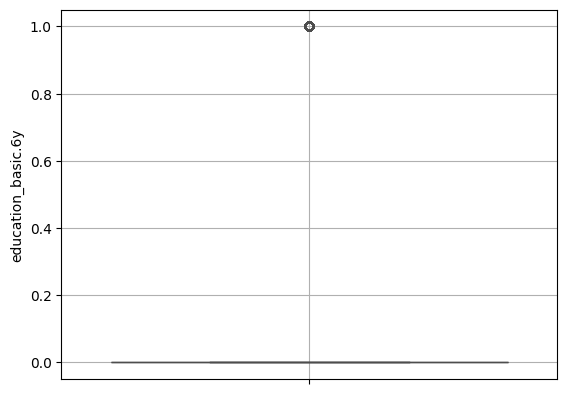

---------education_basic.9y---------


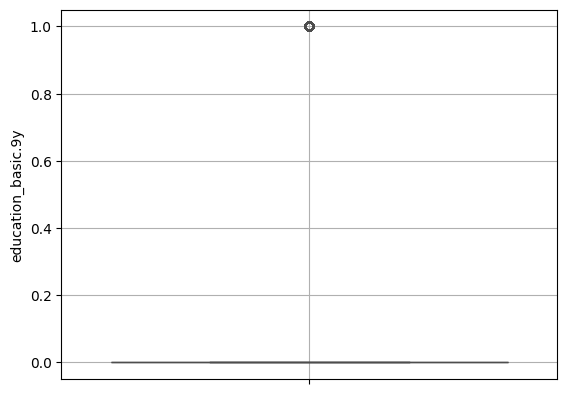

---------education_high.school---------


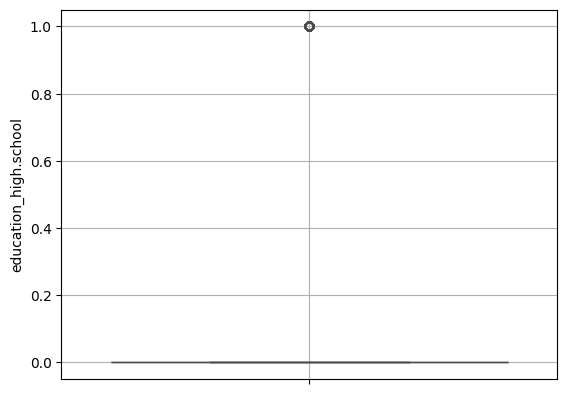

---------education_illiterate---------


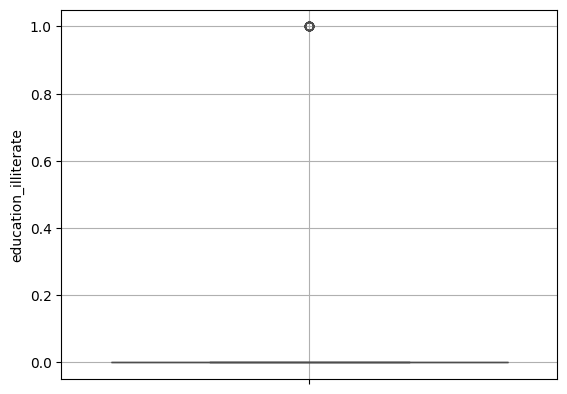

---------education_professional.course---------


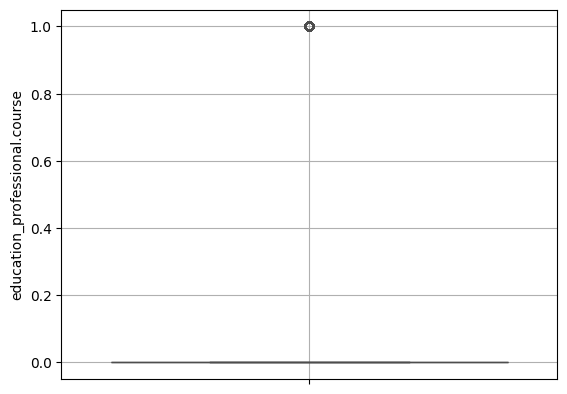

---------education_university.degree---------


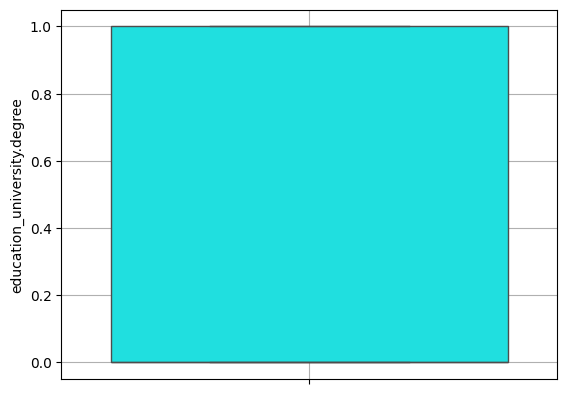

---------education_unknown---------


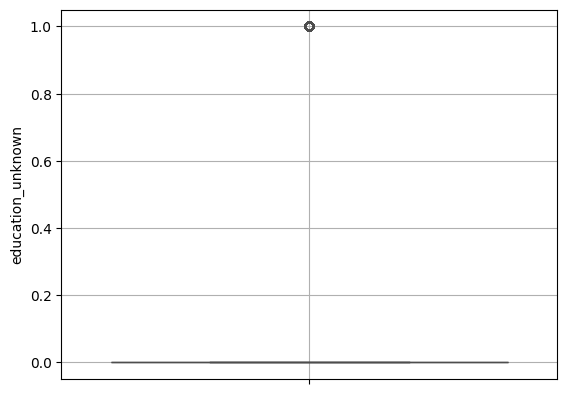

---------default_no---------


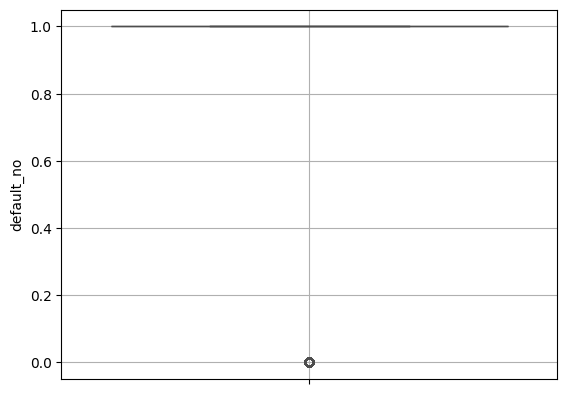

---------default_unknown---------


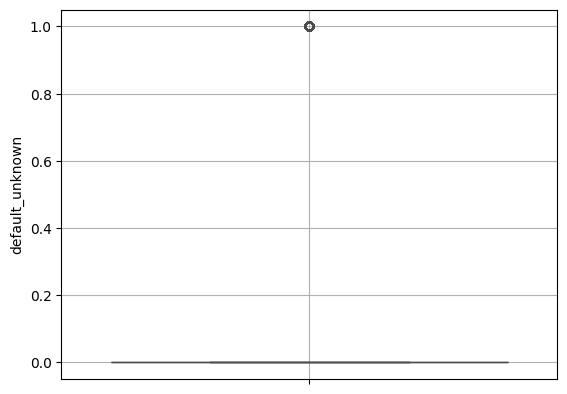

---------default_yes---------


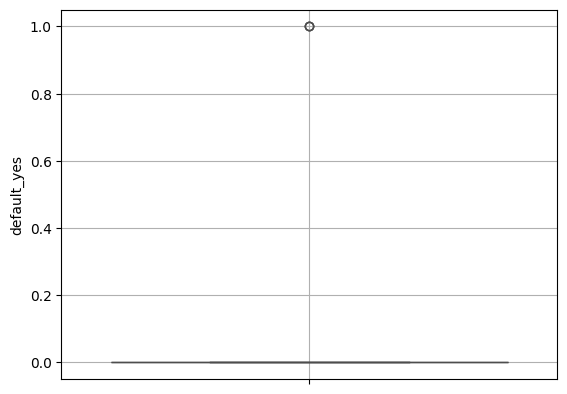

---------housing_no---------


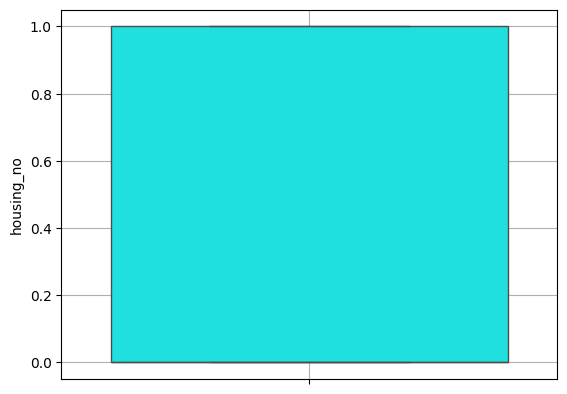

---------housing_unknown---------


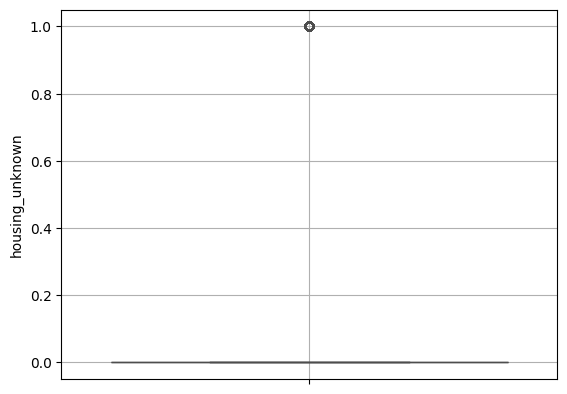

---------housing_yes---------


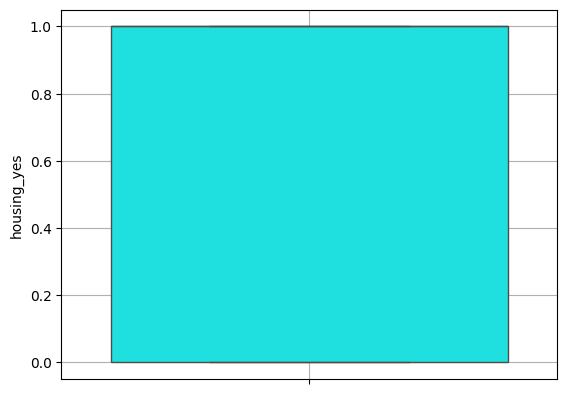

---------loan_no---------


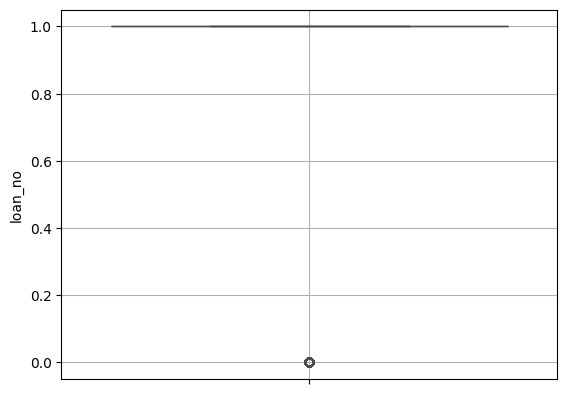

---------loan_unknown---------


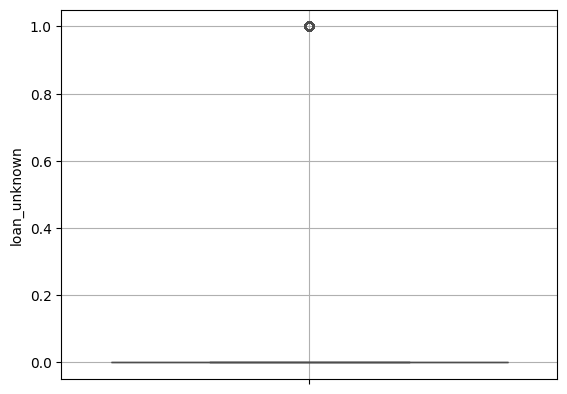

---------loan_yes---------


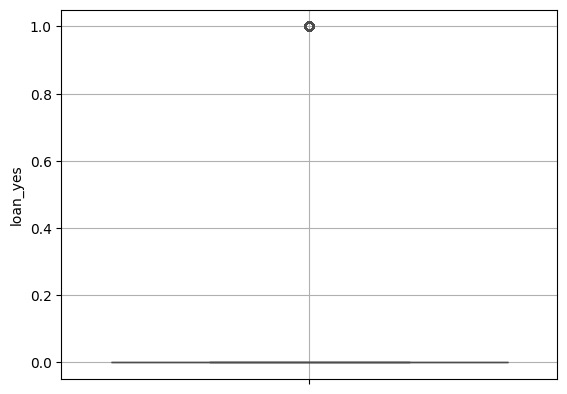

---------contact_cellular---------


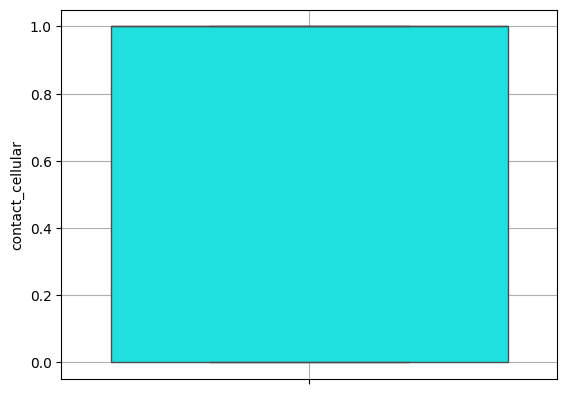

---------contact_telephone---------


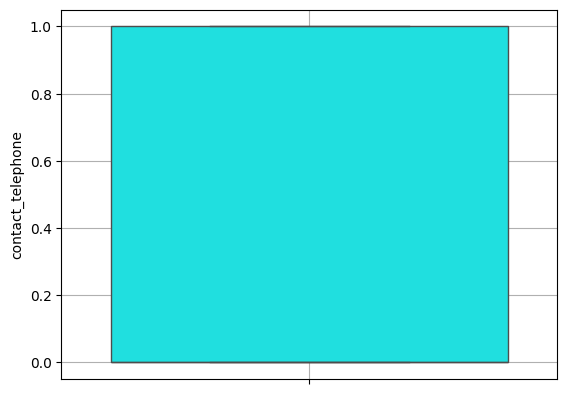

---------month_apr---------


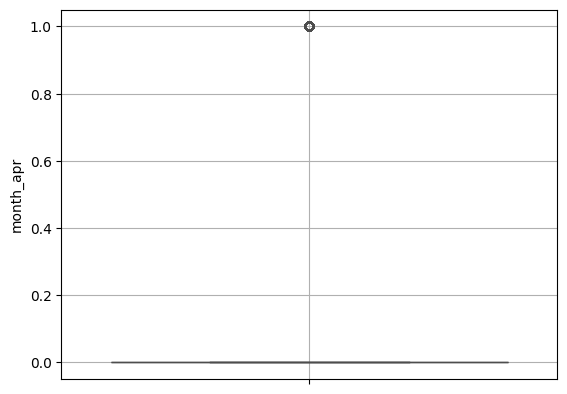

---------month_aug---------


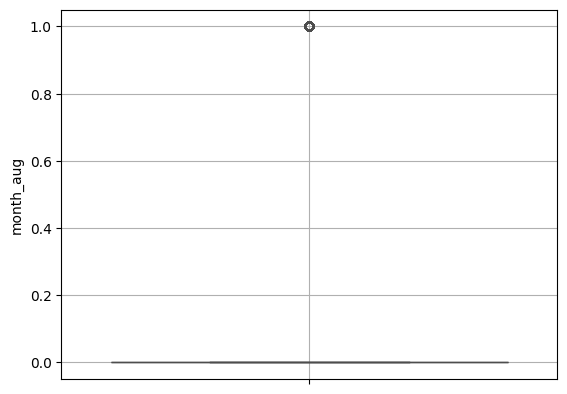

---------month_dec---------


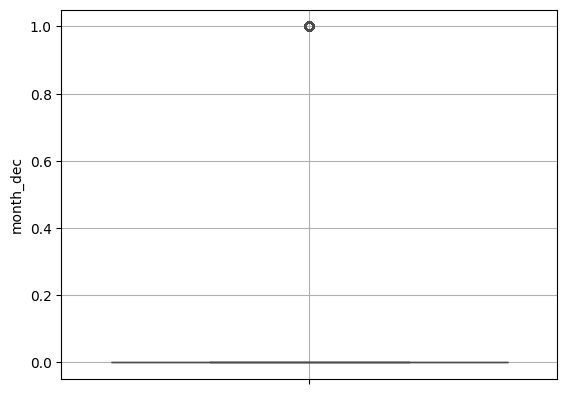

---------month_jul---------


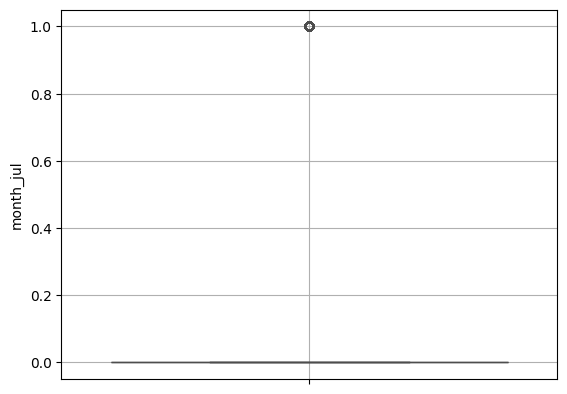

---------month_jun---------


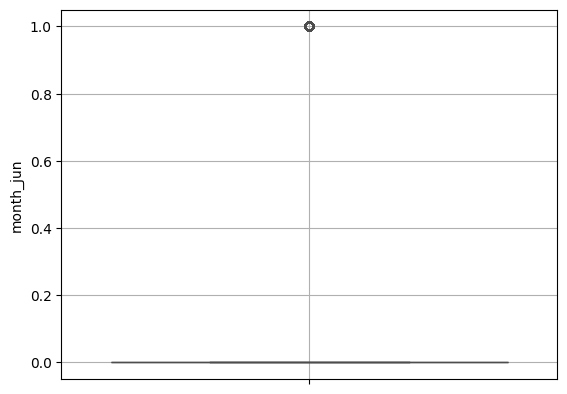

---------month_mar---------


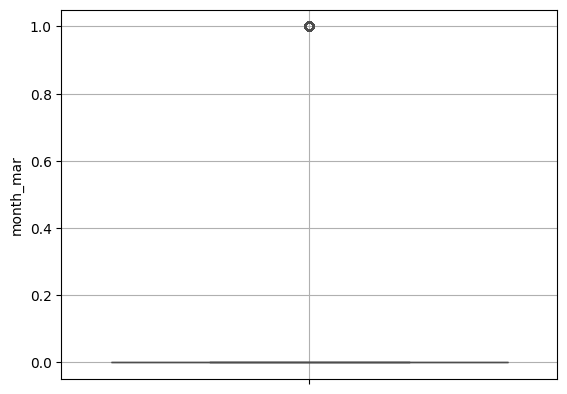

---------month_may---------


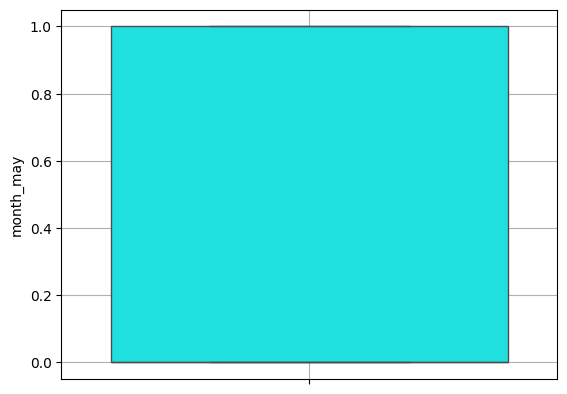

---------month_nov---------


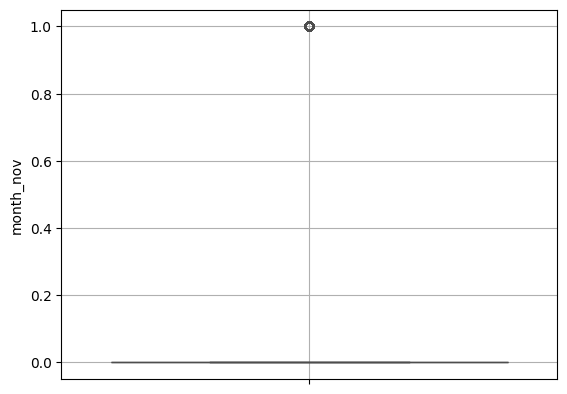

---------month_oct---------


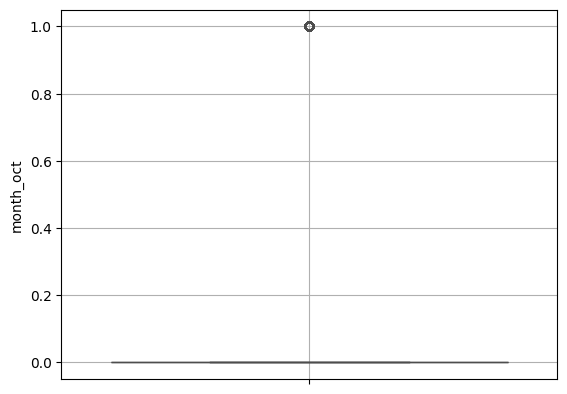

---------month_sep---------


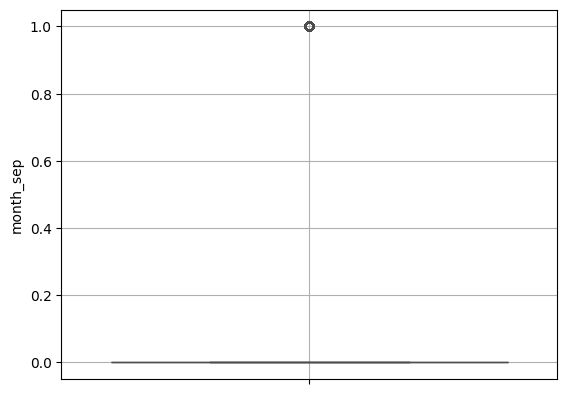

---------day_of_week_fri---------


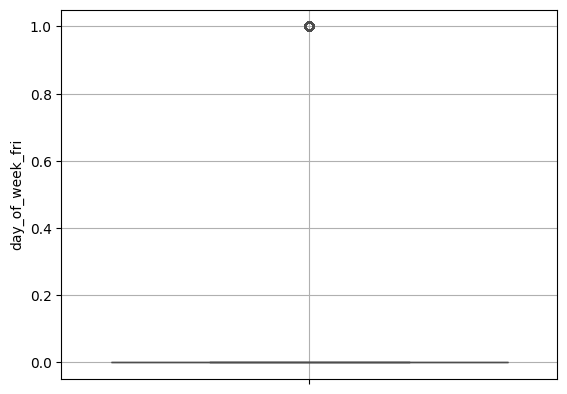

---------day_of_week_mon---------


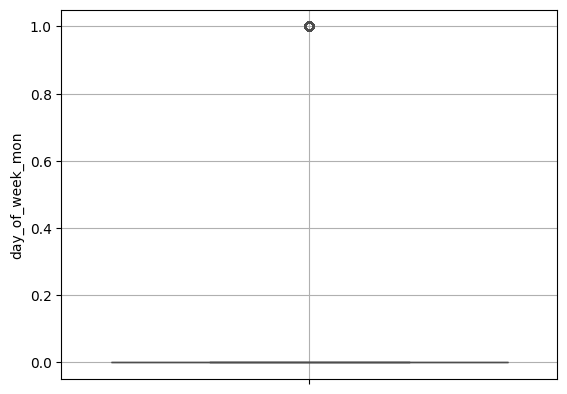

---------day_of_week_thu---------


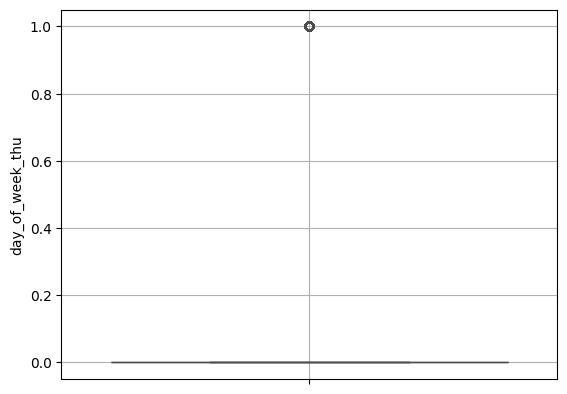

---------day_of_week_tue---------


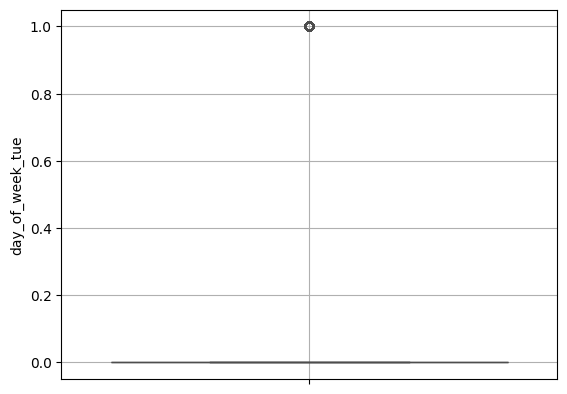

---------day_of_week_wed---------


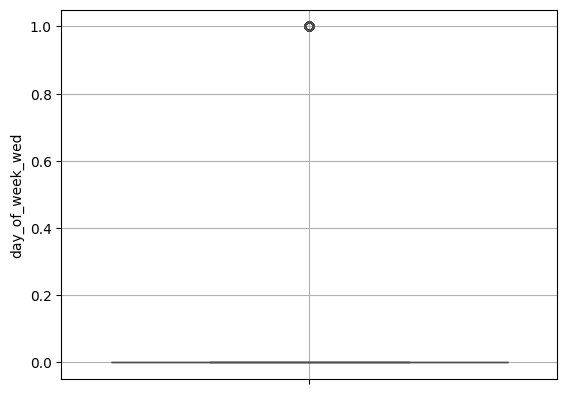

---------poutcome_failure---------


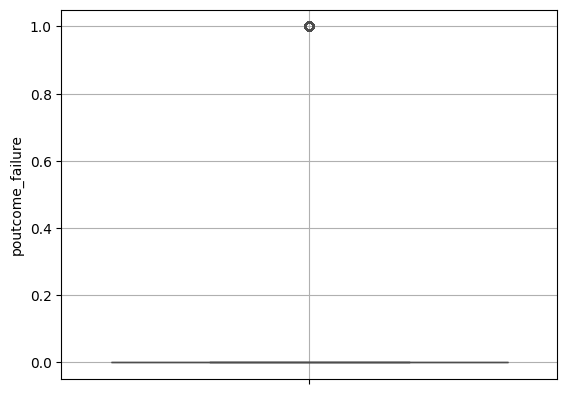

---------poutcome_nonexistent---------


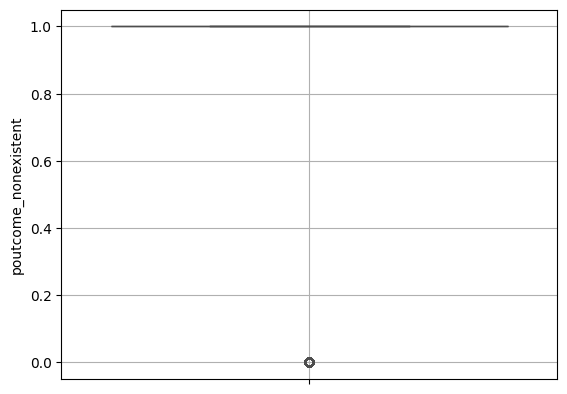

---------poutcome_success---------


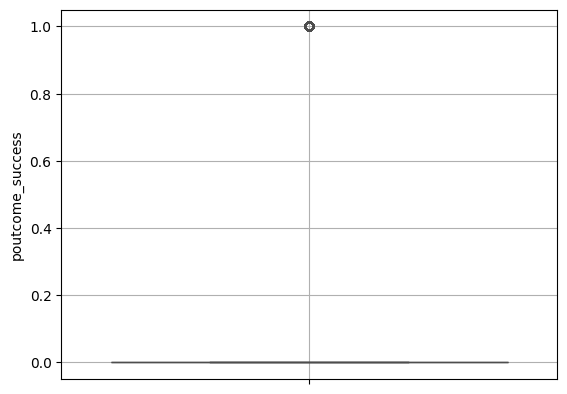

In [52]:
for i in data.columns:
    if i == "Loan_Status_label":
        pass
    else:
        print(f"---------{i}---------")
        sns.boxplot(data[i],color = "aqua")
        plt.grid()
        plt.show()


### Using IQR removing outliers -

In [53]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

print(f"IQR - \n{IQR}")

IQR - 
age                              15.0
campaign                          2.0
pdays                             0.0
previous                          0.0
no_previous_contact               0.0
not_working                       0.0
job_admin.                        1.0
job_blue-collar                   0.0
job_entrepreneur                  0.0
job_housemaid                     0.0
job_management                    0.0
job_retired                       0.0
job_self-employed                 0.0
job_services                      0.0
job_student                       0.0
job_technician                    0.0
job_unemployed                    0.0
job_unknown                       0.0
marital_divorced                  0.0
marital_married                   1.0
marital_single                    1.0
marital_unknown                   0.0
education_basic.4y                0.0
education_basic.6y                0.0
education_basic.9y                0.0
education_high.school             0.0
educa

In [54]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f"lower bound for outliers :\n\n{lower_bound}\n\n ")
print(f"upper bound for outliers :\n\n{upper_bound}\n\n ")

lower bound for outliers :

age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                        -1.5
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0

In [55]:
data[~((data < lower_bound) | (data > upper_bound)).any(axis = 1)]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label


### For prediction result we cannot drop any values as outlier because  whole data of dataset  is usefull data for better prediction result.